<a href="https://colab.research.google.com/github/nortonvanz/Fundamentals/blob/main/Statistic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Livro Base: Estat√≠stica Pr√°tica para Cientistas de Dados - Peter Bruce & Andrew Bruce.

Manter atualizado no Github: https://github.com/nortonvanz/Fundamentals/blob/main/Statistic.ipynb

# Ci√™ncia de Dados

√â transformar grandes quantidades de dados em informa√ß√£o, que ajude a tomar melhores decis√µes.

Combina√ß√£o de disciplinas: matem√°tica, estat√≠stica, ci√™ncia da computa√ß√£o, conhecimento de neg√≥cio.

Ex: feed do instagram (sist. recom), resultados do google  (sist. rank)..

## Dados

Dados n√£o estruturados (sem padr√£o): emails, audios, imagems, v√≠deos, clisckstreams..

Dados estruturados (estrutura padronizada): de bancos de dados, planilhas, sensores..

Tipos:
- Num√©ricos: Cont√≠nuos (float) ou Discretos (int)
- Categ√≥ricos:
  - bin√°rios
  - cat nominais (sem ordem)
  - cat ordinais (com ordem): Ano de constru√ß√£o cont√≠nuo (ex 1900 a 2014), mas n√£o ordinal. Mas se binarizar em d√©cadas (1900-1910, 1911-1920..), se torna categ√≥rica ordinal.

Vari√°veis preditoras (features) s√£o usadas para prever uma vari√°vel dependente (target).

Dados de series temporais registram medi√ß√µes sucessivas da mesma vari√°vel.

In [ ]:
#imports
import pandas                      as pd
import numpy                       as np
from scipy.stats                   import stats, poisson, expon, weibull_min, chi2_contingency
from matplotlib                    import pyplot as plt
import seaborn                     as sns
from math                          import factorial

In [ ]:
#Dataset para exemplificar os conceitos:
pd.options.display.float_format = '{:.2f}'.format
url = "https://raw.githubusercontent.com/nortonvanz/House-Rocket-Real-State-EDA/main/src/kc_house_data.csv" #previs√£o de pre√ßo de im√≥veis em King County #https://www.kaggle.com/datasets/harlfoxem/housesalesprediction
df = pd.read_csv(url, low_memory=False, nrows=100).drop('id', axis=1)
print(df.shape)
df.head()

(100, 20)


date     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  20141013T000000 221900.00         3       1.00         1180      5650   
1  20141209T000000 538000.00         3       2.25         2570      7242   
2  20150225T000000 180000.00         2       1.00          770     10000   
3  20141209T000000 604000.00         4       3.00         1960      5000   
4  20150218T000000 510000.00         3       2.00         1680      8080   

   floors  waterfront  view  condition  grade  sqft_above  sqft_basement  \
0    1.00           0     0          3      7        1180              0   
1    2.00           0     0          3      7        2170            400   
2    1.00           0     0          3      6         770              0   
3    1.00           0     0          5      7        1050            910   
4    1.00           0     0          3      8        1680              0   

   yr_built  yr_renovated  zipcode   lat    long  sqft_living15  sqft_lot15  
0      1955             0    98178 47.51 -122.26           1340        5650  
1      1951          1991    98125 47.72 -122.32           1690        7639  
2      1933             0    98028 47.74 -122.23           2720        8062  
3      1965             0    98136 47.52 -122.39           1360        5000  
4      1987             0    98074 47.62 -122.05           1800        7503

# Estat√≠stica

A estat√≠stica √© a ci√™ncia que se dedica a coletar, organizar e interpretar dados.

A estat√≠stica nos ajuda a entender os dados e tomar decis√µes com base em dados.


Estat√≠sticos estimam, cientistas de dados medem:
- O estat√≠stico foca na foca na contabiliza√ß√£o da incerteza, chama por ex "Estimativas de Localiza√ß√£o".
- O DS foca nos objetivos concretos corporativos, j√° chama de "M√©tricas de Localiza√ß√£o".  

Principais √°reas:
 - 1 Estat√≠stica descritiva: t√©cnicas para descrever e resumir dados.
 - 2 Estat√≠stica inferencial: tirar conclus√µes sobre grandes popula√ß√µes a partir de uma amostra.

## 1 Estat√≠stica Descritiva


√â usada na EDA do projeto.

- An√°lise Univariada: analisa 1 var. Ex: mean, std.
- An√°lise Bivariada: analisa 2 vars. Ex: correla√ß√£o, gr√°fico dispers√£o.
- An√°lise Multivariada: analisa 3 ou + vars. Ex:

Analisar dados √©:

- Identificar comportamentos m√©dios (o padr√£o). Ex: Quantas venda, em m√©dia, s√£o feitas por mes?
- Identificar comportamentos discrepantes (outliers). Ex: em um m√™s do ano, as vendas s√£o 2x maiores.
- Fazer compara√ß√µes. Ex: nos √∫ltimos anos, a idade do cliente vem aumentando, em m√©dia.

[Datalab.net/statistics](https://datatab.net/statistics-calculator/descriptive-statistics)

### 1.1 - M√©tricas de Localiza√ß√£o (Tend√™ncia Central):
Resumem os dados em um √∫nico n√∫mero onde os dados est√£o localizados.



#### M√©dia


M√©dia: ponto central dos dados. Na estat√≠stica, √© o "valor esperado", desde que todos os pontos tenham a mesma chance de acontecer.
- Se jogar 1k vezes um dados de 6 lados n√£o viciado, o valor esperado √© 3,5 (1+2+3+4+5+6 = 21, logo 21/6).
- Usada para dados mais homog√™neos, pois √© muito afetada por outliers.
  - Ex: Qual o patrim√¥nio m√©dio dos moradores de Seattle, onde Bill Gates mora, que tem 100B+ em patrim√¥nio? A m√©dia aqui n√£o resume bem a realidade, pois os 100 bilh√µes do Gates v√£o jogar a m√©dia pra cima!

In [ ]:
#Qual o valor esperado para uma casa?
#10 pre√ßos:
df.price[:10]

0    221900.00
1    538000.00
2    180000.00
3    604000.00
4    510000.00
5   1225000.00
6    257500.00
7    291850.00
8    229500.00
9    323000.00
Name: price, dtype: float64

In [ ]:
#m√©dia:
df.price.mean()
#Algumas casas como a de $1.225.000 puxam a m√©dia pra cima. A mediana aqui d√° uma ideia melhor de centralidade.

519149.35

#### Mediana

Mediana: ponto central de uma lista ordenada. √â o valor que separa a metade maior da metade menor de uma amostra.
- Se n√∫mero total par, √© a m√©dia dos 2 n√∫meros que separam as metades.
- Usada para dados com muita vari√¢ncia, pois n√£o √© afetada por outliers (√© robusta contra).
  - Outlier: valor muito distante de outros. Devem ser investigados, para determinar se s√£o erros ou se representam fen√¥menos reais.
- √â o 2¬∞ quartil, ou 50¬∞ percentil.

In [ ]:
#Qual o valor esperado para uma casa?
#mediana:
df.price.median()
#Robusta contra os pre√ßos outliers, d√° uma boa ideia de um valor esperado de uma casa, sendo robusto contra os outliers.

433750.0

#### Moda

Moda: √© o valor que mais se repete.
- Usada para saber o valor num√©rico ou categ√≥rico que mais se repete. Ou valores, em caso de empate.
- Ex: qual o modelo de carro mais comum? Qual a nota do produto mais comum?

In [ ]:
#A maioria das casas tem quantos quartos?
df.bedrooms.mode()

0    3
Name: bedrooms, dtype: int64

#### Valor Esperado

Valor Esperado (esperan√ßa matem√°tica): m√©dia ponderada, onde os pessos s√£o probabilidades.
- C√°lculo: 1) multiplique os resultados pelas probabilidade de ocorrer. 2) some os valores.
- Ex: Um servi√ßo de nuvem √© ofertad com pacote de 50/m√™s e de 300/m√™s. Em webinars gratu√≠tos, em m√©dia, 15% assinam o de 50, e 5% o de 300. Qual √© o valor esperado de um participante do webinar?

In [ ]:
# Valor Esperado:
ve = (0.05 * 300) + (0.15 * 50)
print(f'O valor esperado de um participante do webinar √© R${ve}')

O valor esperado de um participante do webinar √© R$22.5


### 1.2 - Medidas de Variabilidade (Dispers√£o)

Resumem os dados em um √∫nico n√∫mero, que informa o qu√£o espalhados est√£o, em torno de uma
medida de tend√™ncia central (var e std em torno da m√©dia).

A principal √© o std. Var e std s√£o sens√≠veis aos outliers (pois s√£o baseados em desvios quadr√°ticos). Percentis s√£o robustos.


#### Vari√¢ncia

Vari√¢ncia: Indica a dispers√£o dos dados em torno da m√©dia. [menos usada pq muda a escala]
 - Se os valores estiverem muito espalhados, a vari√¢ncia ser√° grande.
 - Ela muda a escala dos dados (eleva ao quadrado, pra n√£o subtrair os negativos). Ent√£o se √© idade, vira idade ao quadrado.

In [ ]:
#pre√ßos das casas
df.price[:10]

0    221900.00
1    538000.00
2    180000.00
3    604000.00
4    510000.00
5   1225000.00
6    257500.00
7    291850.00
8    229500.00
9    323000.00
Name: price, dtype: float64

In [ ]:
#Vari√¢ncia:
df.price.var()
#a var n√£o diz muito, pois est√° sempre ao quadrado, ent√£o estamos vendo em pre√ßo ao quadrado

92721280476.59337

Par√™nteses:

Coeficiente de Varia√ß√£o: usado para comparar a variabilidade de duas ou mais vars com escalas ou unidades de medida diferentes.
                             
  - Ex: escolher 1 a√ß√£o entre a X e a Y, considerando o n√≠vel de volatilidade de seus retornos.
    - X, tem m√©dia de retorno de 8% a.a, e std de 3%.  CV=37%
    - Y, tem m√©dia de retorno de 10% a.a e std de 12%. CV=120%
    - Usando o CV, posso comparar a dispers√£o relativa dos retornos em rela√ß√£o √†s m√©dias. Conclui-se que Y, √© muito mais vol√°til, logo mais arriscado que X.

- C√°lculo: o quanto o std representa da m√©dia. C√°lculo: (std / media) * 100.

#### Desvio Padr√£o

Desvio Padr√£o: Dist√¢ncia m√©dia dos meus pontos em rela√ß√£o √† m√©dia (centro). √â a raiz quadrada da vari√¢ncia.
- Serve para entender em uma m√©trica, em m√©dia, qu√£o espalhados os dados est√£o com rela√ß√£o a m√©dia.
- Caso dados contenham outliers, ele ser√° distorcido da mesma forma que a m√©dia.
- N√£o pode ser usado para comparar vars com escalas ou unidades de medida diferentes. Usa o Coef Varia√ß√£o.

In [ ]:
#Desvio padr√£o
df.price.std()
#Na m√©dia, uma casa est√° $ 304k distante da m√©dia, indicando uma alta variabilidade nos dados, ou seja, temos valores bem distintos.

304501.6920750907

Al√©m do std, pode-se estimar a dispers√£o dos dados olhando sua distribui√ß√£o:
- Quartil e Percentis:

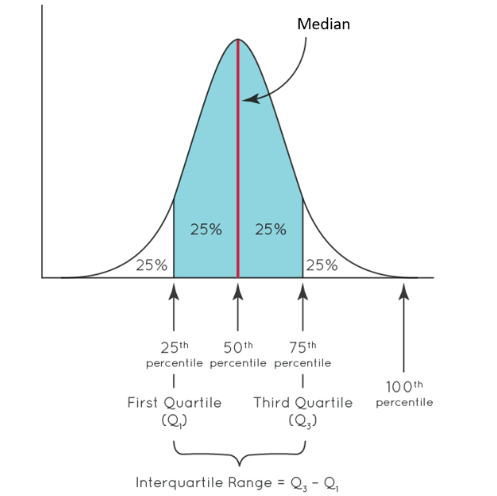

#### Quartis

Quartis:
- 3 Quartis:
 - Q1 (1¬∫ quartil) - √â um **valor** calculado, em que 25% dos dados s√£o menores e 75% dos dados s√£o maiores.
 - Q2 (mediana) - Ou .5 quantil, ou 50¬∫ percentil.
  - Os quantis variam de 0 a 1, mas quando estamos lidando com dados reais (plot de gr√°ficos QQ mais adiante), √© poss√≠vel ver escalas de -3 a 3, por exemplo.
 - Q3 (3¬∫ quartil).
- Caso eu binarize a feature, vou precisar da parte dos dados acima do 3¬∫ quartil, ent√£o faz sentido aqui criar um "Q4", que nesse contexto iria de 75 a 100¬∫ percentil.

Percentil:
- 100 percentis. 50¬∫: [quantil .5] = [mediana (meio exato da distribui√ß√£o)]

#### IQR

IQR:
- interquartile range, dif entre o 25¬∫ e o 75¬∫ percentil.
- Quanto maior, maior a varia√ß√£o dos dados.
- √ötil pra identificar outliers: Valores abaixo de Q1 - (1.5 x IQR) ou acima de Q3 + (1.5 x IQR) s√£o frequentemente considerados outliers. √â assim que o boxplot considera.

In [ ]:
#IQR:
stats.iqr(df.price) #scipy function
#Entre o percentil 25 e o 75, temos $ 345k. Em uma distr. normal, 2/3 dos dados estariam nesta faixa.

345125.0

In [ ]:
#Qual √© o pre√ßo que representa Q1 (25¬∫ percentil)?
df.price.quantile(.25)
#O pre√ßo de $208k separa os 25% menores pre√ßos dos 75% maiores.

308000.0

In [ ]:
# A fun√ß√£o describe() do pandas j√° traz medidas de tend√™ncia central (m√©dia e mediana) e de dispers√£o (std, min, max, percentis):
df.price.describe(percentiles=[.1, .25, .75]) #default is [.25, .5, .75], which returns the 25th, 50th, and 75th percentiles.
#Nos 10% pre√ßos mais baixos, temos casas at√© $22k.

count       100.00
mean     519149.35
std      304501.69
min      153000.00
10%      229950.00
25%      308000.00
50%      433750.00
75%      653125.00
max     2000000.00
Name: price, dtype: float64

### Plots - Univariada

An√°lise Univariada: analisa 1 vari√°vel.

#### Histogram

Histograma: √© uma tabela de frequ√™ncias com em bins iguais.
- Usada para dados num√©ricos.
- Bins da var no eixo x, contagem no y.
- Essa binariza√ß√£o pode ajudar a descobrir rela√ß√£o entre features.

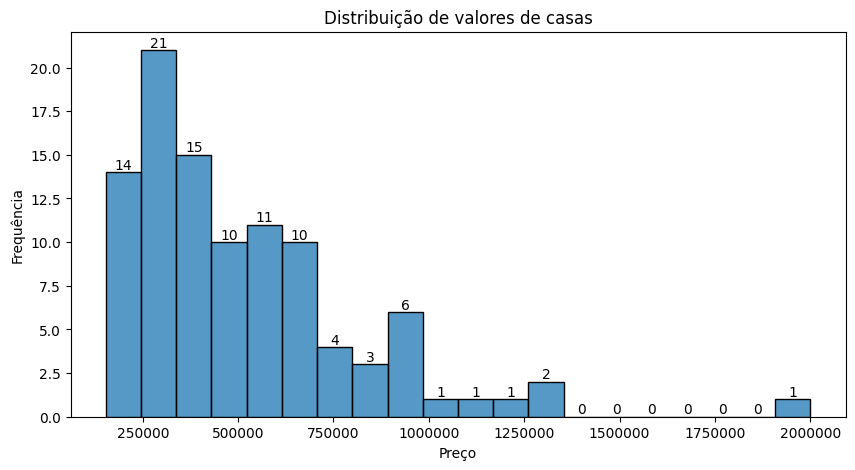

In [ ]:
plt.figure(figsize=(10, 5))
ax = sns.histplot(df['price'], bins=20, kde=False)
plt.title('Distribui√ß√£o de valores de casas')
plt.xlabel('Pre√ßo')
plt.ylabel('Frequ√™ncia')
plt.ticklabel_format(style='plain', axis='x')
# Adicionando legendas no topo das barras
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()

#### Skew

Assimetria (skew): indica se var est√° concentrada em valores maiores ou menores.
- Skew positiva: se desloc p/ esqueda: concentra√ß√£o dos valores √© baixa.
- Skew negativa: se desloc p/ direita (pico na direita): concentra√ß√£o dos valores √© alta.
- Uma distr. normal n√£o tem skew: m√©dia = mediana.

In [ ]:
#Skew de price:
df.price.skew()

1.8255346212208772

#### KDE (Gr√°f Densidade)

Vers√£o simplificada de um histograma.
 Var no eixo x, densidade da probabilidade no eixo y.
 - Densidade de probabilidade: √© uma medida da probabilidade de que a vari√°vel aleat√≥ria tenha um valor pr√≥ximo a um ponto espec√≠fico. Quanto maior a densidade em um ponto, maior a probabilidade de encontrar observa√ß√µes pr√≥ximas a esse valor.

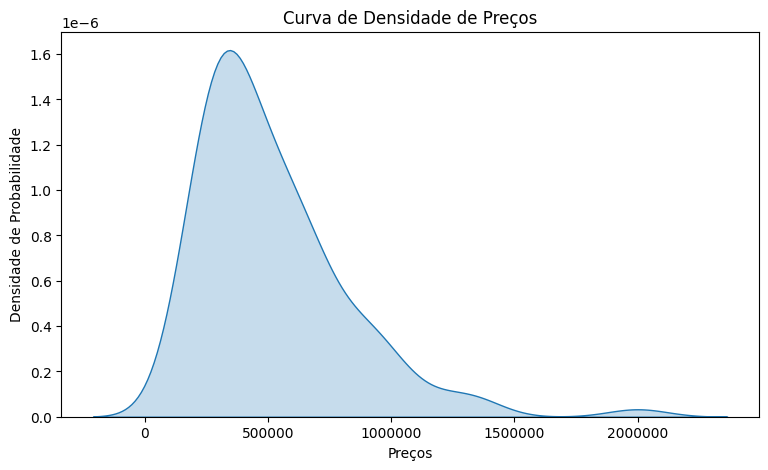

In [ ]:
# Plotar a assimetria da vari√°vel 'price'
plt.figure(figsize=(9, 5))
sns.kdeplot(df['price'], fill=True)
plt.ticklabel_format(style='plain', axis='x')
plt.title('Curva de Densidade de Pre√ßos')
plt.xlabel('Pre√ßos')
plt.ylabel('Densidade de Probabilidade')
plt.show()
#1 √ó 10^(-6) = 1 √∑ 10^6 = 1 √∑ 1,000,000 = 0.000001

Interpreta√ß√£o:
- Curva deslocada para esquerda, logo concentra√ß√£o dos valores √© baixa. Skew √© positiva.
- A densidade de probabilidades √© mais alta em torno de $400k, logo √© maior a probabilidade de encontrarmos pre√ßos pr√≥ximos a esse valor.  

#### Kurtosis

Kurtose: propens√£o dos dados terem valores extremos (achatamento da curva)
- Positiva: pico extremo, cauda longa
- Negativa: pico baixo, cauda curta
- Pr√≥x a zero: distribui√ß√£o noramal

In [ ]:
#Kurtosis de price:
df.price.kurt()

5.118092315921146

O gr√°fico de densidade mais acima j√° mostra a kurtose, que √© alta, indicando a exist√™ncia de valores extremos.

Para plotar tanto a distribui√ß√£o como a densidade, usar kde=True no histplot:

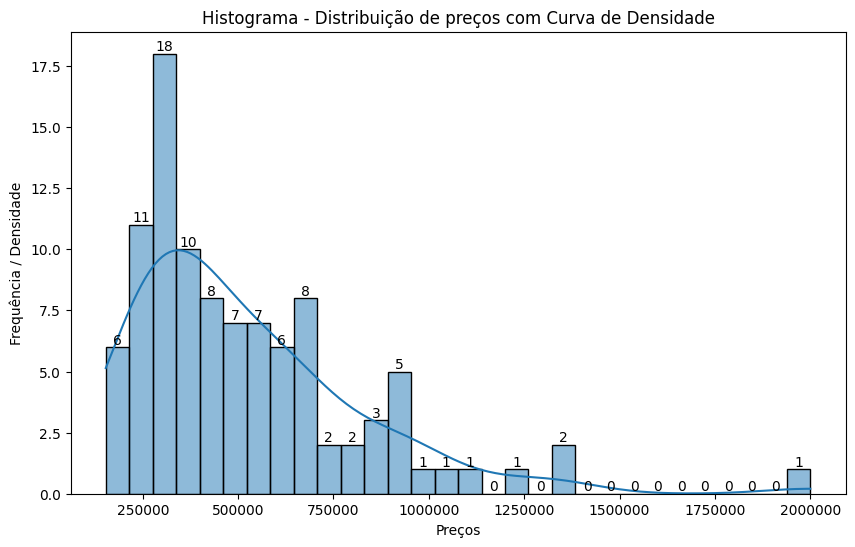

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.histplot(df['price'], bins=30, kde=True)
plt.title('Histograma - Distribui√ß√£o de pre√ßos com Curva de Densidade')
plt.xlabel('Pre√ßos')
plt.ylabel('Frequ√™ncia / Densidade')
plt.ticklabel_format(style='plain', axis='x')
# Adicionando legendas no topo das barras
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()

√â poss√≠vel ver acima a distribui√ß√£o de frequencias, a skew e a curtose da vari√°vel 'price'.

#### Resumo Estat√≠stica Descritiva

##### Numerical Attributes

In [ ]:
num_attributes = df.select_dtypes(include=['int64', 'float64'])
num_attributes.sample(2)

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
75  832500.00         4       4.00         3430     35102    2.00           0   
91 1099880.00         5       2.75         3520      6353    2.00           0   

    view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
75     0          4     10        2390           1040      1986             0   
91     0          4     10        3520              0      2001             0   

    zipcode   lat    long  sqft_living15  sqft_lot15  
75    98075 47.58 -121.99           3240       35020  
91    98199 47.65 -122.39           2520        6250

In [ ]:
#Central tendency metrics: mean and median
ct1 = pd.DataFrame( num_attributes.apply( np.mean ) ).T
ct2 = pd.DataFrame( num_attributes.apply( np.median ) ).T
#Dispersion metrics: standard deviation, min, max, range, skew, kurtosis
d1 = pd.DataFrame ( num_attributes.apply ( np.std ) ).T
d2 = pd.DataFrame ( num_attributes.apply ( min ) ).T
d3 = pd.DataFrame ( num_attributes.apply ( max ) ).T
d4 = pd.DataFrame ( num_attributes.apply ( lambda x: x.max() - x.min() ) ).T
d5 = pd.DataFrame ( num_attributes.apply ( lambda x: x.skew() ) ).T
d6 = pd.DataFrame ( num_attributes.apply ( lambda x: x.kurtosis() ) ).T
#Concatenate
num_metrics = pd.concat( [ d2, d3, d4, ct1, ct2, d1, d5, d6 ] ).T.reset_index()
num_metrics.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis' ]

In [ ]:
num_metrics

attributes       min        max      range      mean    median  \
0           price 153000.00 2000000.00 1847000.00 519149.35 433750.00   
1        bedrooms      2.00       5.00       3.00      3.40      3.00   
2       bathrooms      1.00       4.50       3.50      2.00      2.00   
3     sqft_living    770.00    5420.00    4650.00   2088.72   1930.00   
4        sqft_lot   1044.00  101930.00  100886.00  11732.50   6769.50   
5          floors      1.00       3.00       2.00      1.47      1.50   
6      waterfront      0.00       1.00       1.00      0.01      0.00   
7            view      0.00       4.00       4.00      0.18      0.00   
8       condition      1.00       5.00       4.00      3.43      3.00   
9           grade      5.00      11.00       6.00      7.61      7.00   
10     sqft_above    765.00    3890.00    3125.00   1764.69   1660.00   
11  sqft_basement      0.00    1700.00    1700.00    324.03      0.00   
12       yr_built   1900.00    2014.00     114.00   1966.87   1967.50   
13   yr_renovated      0.00    2002.00    2002.00     59.84      0.00   
14        zipcode  98001.00   98199.00     198.00  98075.66  98059.00   
15            lat     47.29      47.76       0.47     47.54     47.57   
16           long   -122.45    -121.71       0.74   -122.23   -122.27   
17  sqft_living15    890.00    4760.00    3870.00   1965.12   1790.00   
18     sqft_lot15   1106.00  135036.00  133930.00  12005.52   6935.00   

         std  skew  kurtosis  
0  302975.36  1.83      5.12  
1       0.79  0.40     -0.21  
2       0.72  0.41      0.41  
3     856.22  1.11      1.80  
4   14725.89  3.53     15.36  
5       0.51  0.58     -0.54  
6       0.10 10.00    100.00  
7       0.74  4.21     17.06  
8       0.72  0.57      0.90  
9       1.04  1.01      1.61  
10    720.76  0.74      0.01  
11    467.73  1.39      1.12  
12     28.33 -0.33     -0.73  
13    340.27  5.59     29.90  
14     52.02  0.29     -0.98  
15      0.14 -0.30     -1.33  
16      0.14  0.87      0.66  
17    707.36  1.21      2.01  
18  18576.44  4.62     24.47

##### Cathegorical Attributes

In [ ]:
cat_attributes = df.select_dtypes(exclude=['int64', 'float64'])
cat_attributes.sample(2)

date
28  20140624T000000
26  20140626T000000

In [ ]:
#variations of each cat column
pd.set_option('max_colwidth', 150)
print(f"- Distinct values:\n{cat_attributes.apply( lambda x: x.unique().shape[0] ) } \n" )
print(f"- Variations:\n{cat_attributes.apply( lambda x: x.unique() ) } " )

- Distinct values:
date    86
dtype: int64 

- Variations:
               date
0   20141013T000000
1   20141209T000000
2   20150225T000000
3   20150218T000000
4   20140512T000000
..              ...
81  20140725T000000
82  20141223T000000
83  20140908T000000
84  20150330T000000
85  20140711T000000

[86 rows x 1 columns] 


Aqui n√£o foi muito √∫til, mas tendo mais vars, √© interessante ver as principais varia√ß√µes, para ter ideias das categorias existentes.

### Plots - Bi e Multivariada



- An√°lise Bivariada: analisa 2 vars. Ex: correla√ß√£o, gr√°fico dispers√£o.
- An√°lise Multivariada: analisa 3 ou + vars. Ex:

#### Correlation

Correla√ß√£o: entre vars preditoras, e entre preditoras e var alvo:
- Vars X e Y s√£o correlacionadas, se valores altos de X acompanharem valores altos de Y.
- Idem pra baixos. Se valores altos de x acompanharem valores baixo de Y, s√£o negativamente correlacionadas.  

Legendas das correla√ß√µes abaixo:
- num x num: entre 2 feat. num√©ricas.
- cat x cat: entre 2 feat. categ√≥ricas.
- cat x num: entre 1 num√©rica e 1 categ√≥rica.


##### Pearson (num x num)

Coeficiente de corr de Pearson: mede a for√ßa e a dire√ß√£o da rela√ß√£o linear entre duas vars num√©ricas.
- Interpreta√ß√£o: 1=corr perfeita. -1=corr negativa perfeita. 0=aus√™ncia de corr.
- Premissas:
 - Vari√°veis cont√≠nuas: n√£o √© apropriado para vars categ√≥ricas ou ordinais. Sendo cont√≠nuas, as vari√°vies podem estar em escalas diferentes.
 - Linearidade: vars tem rela√ß√£o linear, ou seja, ao plotar um scatterplot, pontos devem formar um padr√£o que possa ser aproximado por uma reta. (ver via scatterplot)
 - Aus√™ncia de outliers influentes: podem influenciar no c√°lculo. (ver tamb√©m via scatterplot)
 - Normalidade: vari√°vies devem seguir uma distr. normal. Isso √© mais importante para a signific√¢ncia estat√≠stica, e menos para a interpreta√ß√£o do valor do coeficiente. (ver via scipy.stats.shapiro ou scipy.stats.kstest)
 - Homocedasticidade: o espalhamento dos pontos ao longo da linha de regress√£o deve ser homog√™neo. (ver via gr√°fico de res√≠duos)
 - Independ√™ncia dos dados: os dados de X e Y devem ser independentes. (ver via conhec. neg√≥cio)




In [ ]:
# Existe correla√ß√£o entre o ano de constru√ß√£o e o tamanho do metro quadrado constru√≠do?
# C√°lculo do coeficiente de correla√ß√£o de Pearson
df['yr_built'].corr(df['sqft_lot'])

0.12409744324352504

O resultado indica que h√° bem pouca correla√ß√£o entre o ano de constru√ß√£o e o tamanho do metro quadrado constru√≠do.

OBS: n√£o validei se todas as premissas foram atendidas. Ainda que na pr√°tica, violaremos algumas vezes.

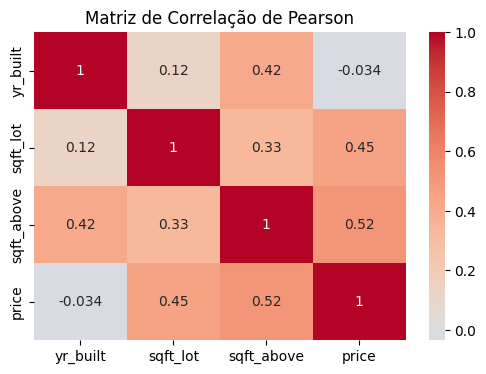

In [ ]:
# C√°lculo da matriz de correla√ß√£o
matriz_correlacao = df[['yr_built','sqft_lot','sqft_above','price']].corr()

# Plotando a matriz de correla√ß√£o com seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correla√ß√£o de Pearson')
plt.show()

O resultado indica que h√° uma correla√ß√£o m√©dia entre o pre√ßo e a metragem do por√£o.
OBS: n√£o validei se todas as premissas foram atendidas.

##### Spearman (cat ord x (num || cat ord) )
(cat ord x num ) ou (cat ord x cat ord)

Coeficiente de correla√ß√£o de Spearman (œÅ (rho)): mostra a associa√ß√£o entre vars por meio de uma fun√ß√£o n√£o linear.
- Interpreta√ß√£o: 1=corr perfeita. -1=corr negativa perfeita. 0=aus√™ncia de corr.
- √â adequado para avaliar a correla√ß√£o entre:
 - Dupla Ordinal: duas vars categ√≥ricas ordinais.
 - Categ√≥rica orginal vs num√©rica.
- Mede a rela√ß√£o monot√¥nica entre duas vari√°vis: se aumentando x, aumenta y, ou se aumentando x, diminui y, ou se s√£o independentes (sem rela√ß√£o nonot√¥nica.).

Premissas:
- vars devem ser: Dupla ordinal, ou ordinal + num√©rica.
 - poderia converter uma var cont√≠nua em ordinal cat, binarizando (ex: idades cont√≠nuas em bins de 1 a 5), mas pode haver perda de informa√ß√£o pela perda de variabilidade.
- n√£o requer que a rela√ß√£o entre as vars seja linear
- indiferente a outliers


No contexto deste dataset, pode ser usada para avaliar Price (cont√≠nua) vs Condicion (cat ordinal, que varia de 1 a 5):

In [ ]:
df.condition.value_counts()

condition
3    62
4    26
5    10
1     1
2     1
Name: count, dtype: int64

In [ ]:
#Existe correla√ß√£o entre o pre√ßo e a condi√ß√£o avaliada da casa?
df['price'].corr(df['condition'], method='spearman')

-0.00011137173377838369

O resultado indica que n√£o h√° correla√ß√£o entre o pre√ßo e a condi√ß√£o avaliada da casa.

In [ ]:
#e com grade, que tamb√©m √© categ√≥rica?
df.grade.value_counts()

grade
7     50
8     28
9     10
6      5
10     4
11     2
5      1
Name: count, dtype: int64

In [ ]:
#Existe correla√ß√£o entre o pre√ßo e a nota avaliada da casa?
df['price'].corr(df['grade'], method='spearman')

0.6787930814657495

O resultado indica que h√° uma correla√ß√£o moderada/forte entre o pre√ßo e a nota avaliada da casa!

##### Coeficiente de Cram√©r V (cat x (cat || num binarizada )

Usado para medir a associa√ß√£o entre vari√°veis categ√≥ricas (nominais ou ordinais, indiferente).
- Ele varia de 0 a 1, onde 0 = aus√™ncia de associa√ß√£o entre as vars, e 1 = associa√ß√£o perfeita.
- Pode ser usado entre cat e num, ap√≥s categorizar a var num√©rica.
Premissas:
 - Vari√°veis categ√≥ricas (nominais ou ordinais, indiferente)
 - Independ√™ncia: entre as vars.
 - Tamanho da amostra: resultados mais confi√°veis s√£o obtidos com tamanhos de amostras maiores.
 - Distribui√ß√£o de frequ√™ncias: as frequ√™ncias esperadas em cada c√©lula da tabela de conting√™ncia devem ser suficientemente grandes (geralmente, cada c√©lula deve ter uma frequ√™ncia esperada de pelo menos 5).

Ex: Qual √© a correla√ß√£o entre Grade e Condition (cat x cat)?

In [ ]:
df[['grade','condition']][:3]

grade  condition
0      7          3
1      7          3
2      6          3

In [ ]:
# Criando a tabela de conting√™ncia
contingency_table = pd.crosstab(df['condition'], df['grade'])

# Calculando a estat√≠stica do qui-quadrado
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Calculando o coeficiente de Cram√©r V
n = contingency_table.sum().sum()  # Total de observa√ß√µes
cramer_v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))

# Exibindo o resultado
print(f"Coeficiente de Cram√©r V: {cramer_v}")

Coeficiente de Cram√©r V: 0.5166753190586455


Ex: Qual √© a correla√ß√£o entre Grade e Metro quadrado constru√≠do? (catr x num binarizada)?

In [ ]:
df[['grade','sqft_living']][:3]

grade  sqft_lot
0      7      5650
1      7      7242
2      6     10000

In [ ]:
print(f'sqft_lot min: {df.sqft_living.min()}  |  sqft_lot max: {df.sqft_living.max()} ')

sqft_lot min: 770  |  sqft_lot max: 5420 


In [ ]:
# Categorizar a vari√°vel num√©rica em bins
bins = [0, 2000, 3800, 5400]  # Definindo os intervalos
labels = ['Pequeno', 'M√©dio', 'Grande']  # Definindo os r√≥tulos da metragem constru√≠da
df['sqft_lot_cat'] = pd.cut(df['sqft_lot'], bins=bins, labels=labels)

# Criando a tabela de conting√™ncia
contingency_table = pd.crosstab(df['grade'], df['sqft_lot_cat'])

# Calculando a estat√≠stica do qui-quadrado
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Calculando o coeficiente de Cram√©r V
n = contingency_table.sum().sum()  # Total de observa√ß√µes
cramer_v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))

# Exibindo o resultado
print(f"Coeficiente de Cram√©r V: {cramer_v}")

Coeficiente de Cram√©r V: 0.19694638556693236


A correla√ß√£o entre Grade e Metro quadrado constru√≠do √© baixa.

#### Scatterplot (num x num)

Gr√°fico de Dispers√£o (scatterplot): mostra o relacionamento entre duas vari√°veis.
- Bom para um n√∫mero pequeno de amostras. Usar colmeia se grande.
- Ex: ver a correla√ß√£o entre yr_built e price:

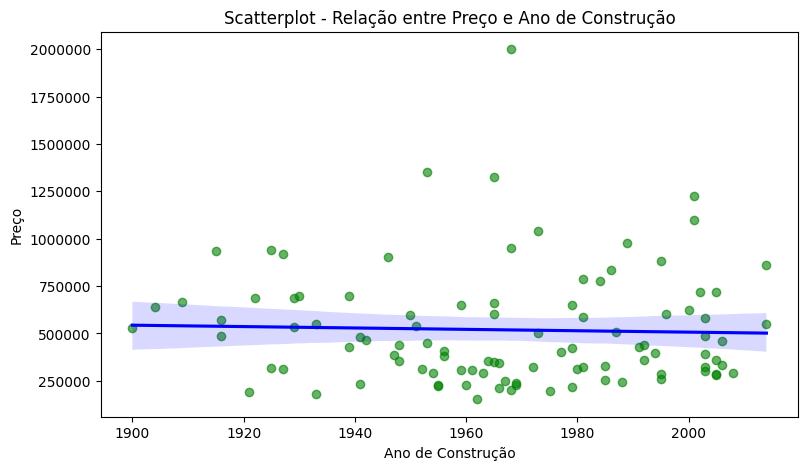

In [ ]:
# Regplot para pre√ßo vs ano de constru√ß√£o
  #Regplot = Scatterplot com linha de regress√£o, comum pois a reta de regress√£o ajuda a identificar padr√µes leneares nos dados.
plt.figure(figsize=(9, 5))
#plt.scatter(df['yr_built'], df['price'], color='green', label='Pre√ßo', alpha=0.5)
sns.regplot(x='yr_built', y='price', data=df, scatter_kws={'color': 'green', 'alpha': 0.6}, line_kws={'color': 'blue'})  #scatter + linha de regress√£o
plt.ticklabel_format(style='plain', axis='y')
plt.title("Scatterplot - Rela√ß√£o entre Pre√ßo e Ano de Constru√ß√£o")
plt.xlabel("Ano de Constru√ß√£o")
plt.ylabel("Pre√ßo")
plt.show()

Considerando a rela√ß√£o entre pre√ßo e ano de constru√ß√£o, n√£o √© vis√≠vel uma tend√™ncia de aumento de pre√ßo, ao longo do tempo.

#### Contingency table (cat x cat)

Tabela de conting√™ncia: avalia a correla√ß√£o entre vari√°veis categ√≥ricas
- Qual a correla√ß√£o entre o n√∫mero de quartos e a nota?

In [ ]:
#Tabela de conting√™ncia
pd.crosstab( df['bedrooms'], df['grade'] )

grade     5   6   7   8   9   10  11
bedrooms                            
2          0   1   8   0   0   0   0
3          0   4  26  17   5   0   0
4          1   0  14   6   4   3   1
5          0   0   2   5   1   1   1

In [ ]:
# Tabela de conting√™ncia %
cont_table_norm = pd.crosstab( df['bedrooms'], df['grade'],normalize=True)
cont_table_norm
#normalize='columns' = across cols,
            #'index' = across rows,
            # True   = across entire df.

grade      5    6    7    8    9    10   11
bedrooms                                   
2        0.00 0.01 0.08 0.00 0.00 0.00 0.00
3        0.00 0.04 0.26 0.17 0.05 0.00 0.00
4        0.01 0.00 0.14 0.06 0.04 0.03 0.01
5        0.00 0.00 0.02 0.05 0.01 0.01 0.01

Plotar no formato de Heatmap, para melhor compreens√£o:

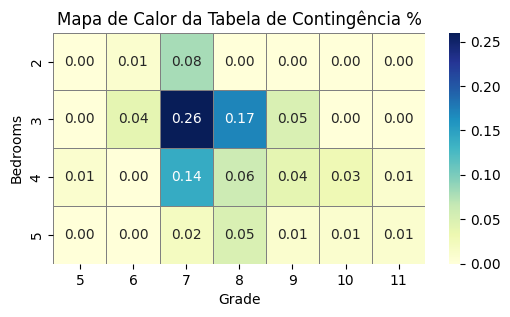

In [ ]:
# Criando o mapa de calor
plt.figure(figsize=(6, 3))
sns.heatmap(cont_table_norm, annot=True, fmt='.2f', cmap='YlGnBu', cbar=True, linewidths=0.5, linecolor='gray')
plt.title('Mapa de Calor da Tabela de Conting√™ncia %')
plt.xlabel('Grade')
plt.ylabel('Bedrooms')
plt.show()

#### Bar (cat x num)

Gr√°fico de barras: comparar m√©dia, soma ou contagem de var num em uma categ√≥rica.

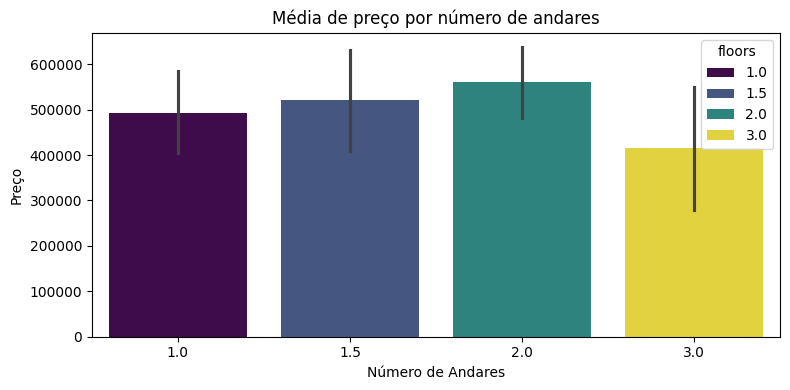

In [ ]:
#M√©dia de pre√ßo por n√∫mero de andares:
plt.figure(figsize=(8, 4));
sns.barplot(x='floors', y='price', data=df, estimator='mean', palette='viridis', hue='floors')
plt.title('M√©dia de pre√ßo por n√∫mero de andares')
plt.xlabel('N√∫mero de Andares')
plt.ylabel('Pre√ßo')
plt.tight_layout()
plt.show();

#### Boxplot (cat x num)

Boxplot: ver distribui√ß√£o de var categ√≥cica vs num√©rica
  - Robusto contra outliers
  - Ex: Pre√ßo de casas por quantidade de pisos



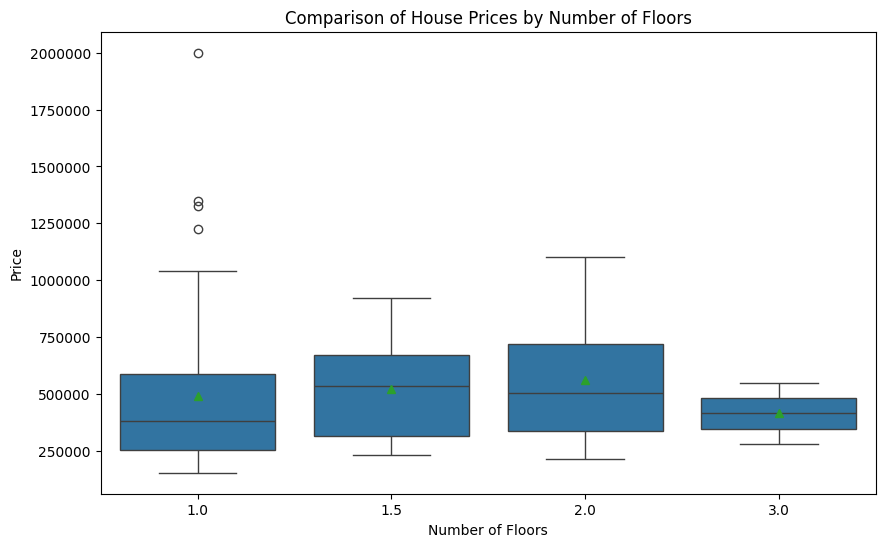

In [ ]:
#Comparar casas por n√∫mero de pisos:
plt.figure(figsize=(10, 6))
sns.boxplot(x='floors', y='price', data=df, showmeans=True)
plt.ticklabel_format(style='plain', axis='y')
plt.title('Comparison of House Prices by Number of Floors')
plt.xlabel('Number of Floors')
plt.ylabel('Price')
plt.show()
#Com plotly express, pra ver os pontos:
#import plotly.express              as px
#fig = px.box(df, x='floors', y='price', points='all', title='Comparison of House Prices by Number of Floors')
#fig.show()

Interpreta√ß√£o:
- √Årea em azul: IQR (Q1 a Q3): parte central dos dados.
- Linha central: mediana (Q2).
 - Simetria: Se mediana + pr√≥x de Q1, skew positiva: concentra√ß√£o dos valores √© baixa. Se de Q3, √© alta.
- Tri√¢ngulo verde: m√©dia.
- T-Shaped Whiskers:
 - Se longos, indica grande varia√ß√£o nos dados.
 - Se estendem at√© (IQR X 1.5): o menor e o maior valor que n√£o s√£o considerados outliers.
 - Pontos fora s√£o outliers: 'o'.


In [ ]:
#Outliers: Valores abaixo de Q1 - (1.5 x IQR) ou acima de Q3 + (1.5 x IQR). C√°lculo no bra√ßo deles:
Q1_ = 308000.00
Q3_ = 653125.00
IQR_ = 308000.0

print(f'Outliers: pre√ßos abaixo de: {Q1_ - (1.5 * IQR_)} ou acima de: {Q3_ + (1.5 * IQR_) }')

Outliers: pre√ßos abaixo de: -154000.0 ou acima de: 1115125.0


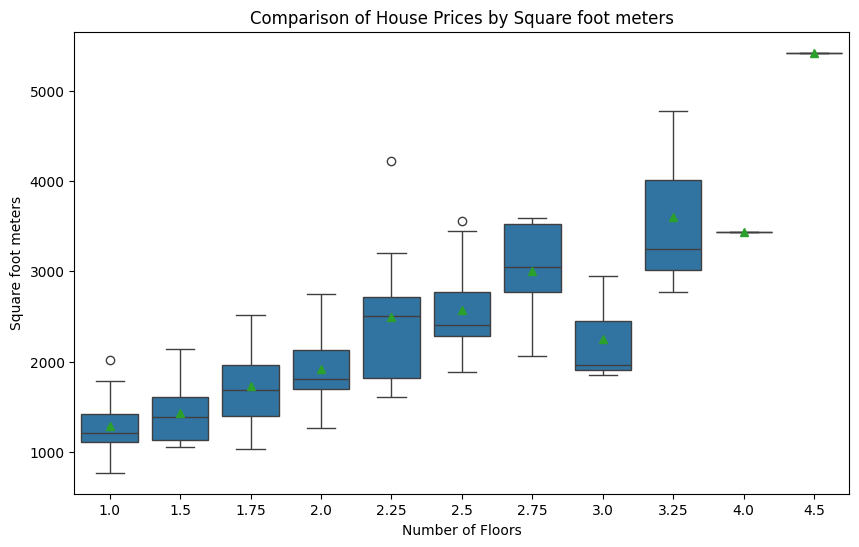

In [ ]:
#Outro exemplo: N√∫mero de banheiros por metro quadrado constru√≠do:
plt.figure(figsize=(10, 6))
sns.boxplot(x='bathrooms', y='sqft_living', data=df, showmeans=True)
plt.ticklabel_format(style='plain', axis='y')
plt.title('Comparison of House Prices by Square foot meters')
plt.xlabel('Number of Floors')
plt.ylabel('Square foot meters')
plt.show()

Em geral, o n√∫mero de banheiros aumenta, conforme a metragem constru√≠da aumenta.

#### Violin (cat x num)

Gr√°fico de Violino: √© o boxplot com estimativas de densidade no eixo y
- Vantagem: d√° melhor ideia da concentra√ß√£o dos dados ao longo de y.
- Desvangagem: n√£o mostra outliers com clareza.

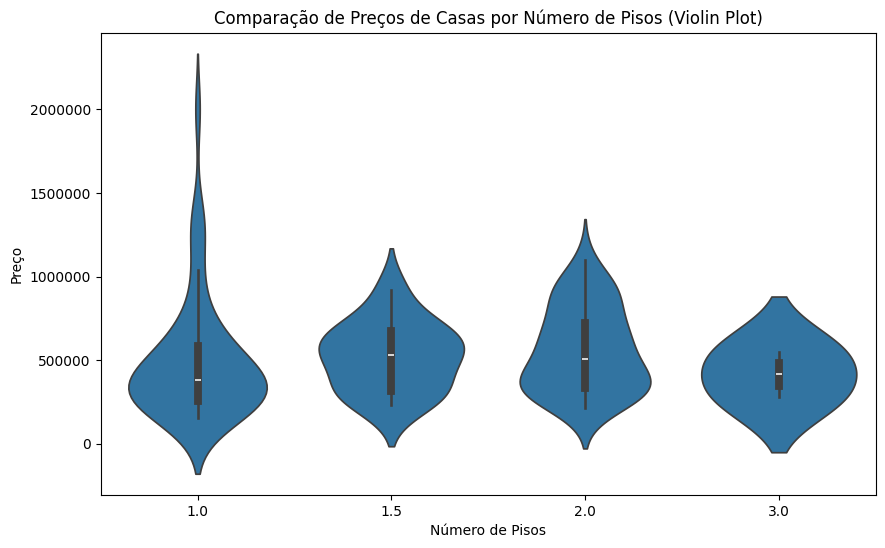

In [ ]:
# Crie a figura
plt.figure(figsize=(10, 6))
sns.violinplot(x='floors', y='price', data=df)
plt.ticklabel_format(style='plain', axis='y')
plt.title('Compara√ß√£o de Pre√ßos de Casas por N√∫mero de Pisos (Violin Plot)')
plt.xlabel('N√∫mero de Pisos')
plt.ylabel('Pre√ßo')
plt.show()

Aqui, quanto mais largo o corpo do violino, mais amostras est√£o concentradas naquele ponto no eixo y.

#### Hexbin (cat x num)

Gr√°fico de Colmeia: similar ao scatter (rela√ß√£o entre 2 vars), mas ao inv√©s de mostrar os pontos, agrupa em hex√°gonos, com cor indicando o n√∫mero de registros naquela √°rea.

In [ ]:
#carregar 5k pontos agora:
df2 = pd.read_csv(url, low_memory=False, nrows=5000).drop('id', axis=1)
#remover acima de 1.1m (outliers), para poder visualizar melhor:
df2 = df2.loc[df2.price < 1100000 ]
df2.shape

(4726, 20)

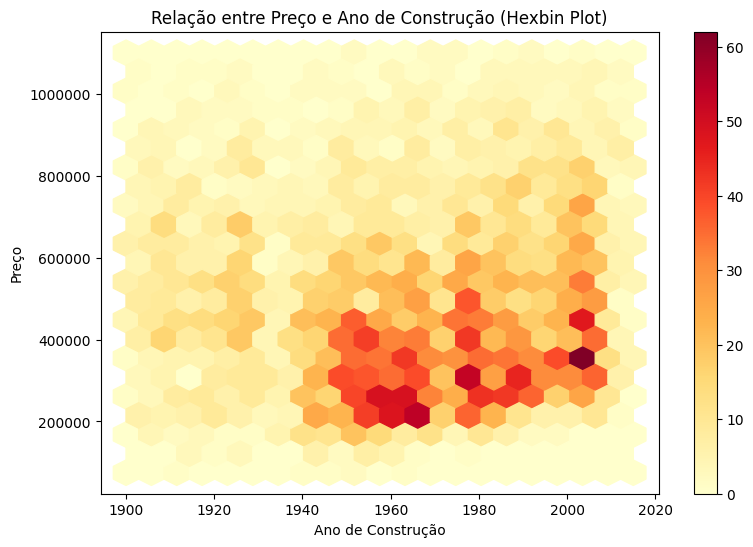

In [ ]:
# Hexbin plot
plt.figure(figsize=(9, 6))
plt.hexbin(x=df2['yr_built'], y=df2['price'], gridsize=20, cmap='YlOrRd')
plt.ticklabel_format(style='plain', axis='y')
plt.title("Rela√ß√£o entre Pre√ßo e Ano de Constru√ß√£o (Hexbin Plot)")
plt.xlabel("Ano de Constru√ß√£o")
plt.ylabel("Pre√ßo")
plt.colorbar();

Acima √© poss√≠vel ver uma fraca correla√ß√£o entre pre√ßo e ano, dado que na direita do gr√°fico, h√° um pouco mais de concentra√ß√£o (cores escuras) na parte superior do gr√°fico, indicando maiores pre√ßos.

#### KDE (cat x num)

Gr√°fico de densidade (KDE - kernel density estimate): mapa topogr√°fico das vari√°veis, onde n√≠veis mais altos indica maior concentra√ß√£o.

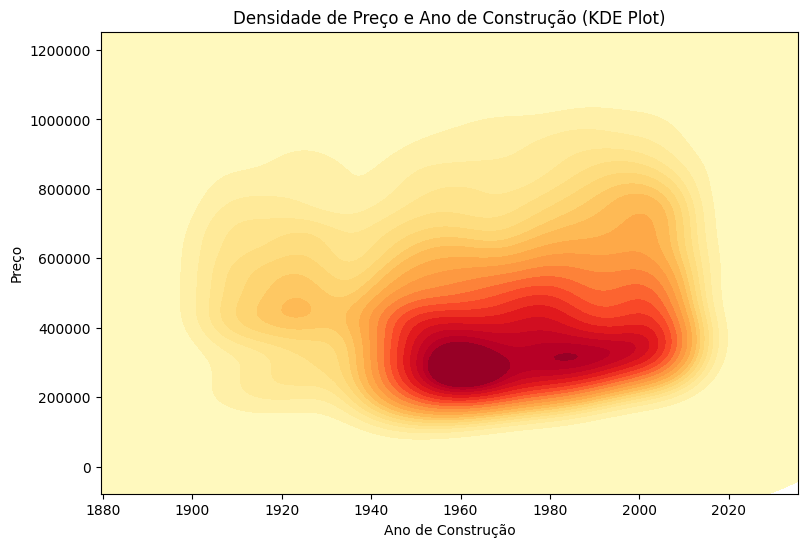

In [ ]:
# KDE plot
plt.figure(figsize=(9, 6))
sns.kdeplot(x=df2['yr_built'], y=df2['price'], cmap='YlOrRd', fill=True, thresh=0, levels=20)
plt.ticklabel_format(style='plain', axis='y')
plt.title("Densidade de Pre√ßo e Ano de Constru√ß√£o (KDE Plot)")
plt.xlabel("Ano de Constru√ß√£o")
plt.ylabel("Pre√ßo")
plt.show()

√â poss√≠vel ver que a maioria das amostras est√° concentrada em casas dos anos 60, e a maioria dos pre√ßos entre 200 a 400k.

## 2 Estat√≠stica Inferencial


Estat√≠stica inferencial: fazer generaliza√ß√µes e tirar conclus√µes sobre uma popula√ß√£o a partir de uma amostra representativa.
- 'n'=amostra  |  'N'=popula√ß√£o.
- Œº (letra grega "mi")=m√©dia da popula√ß√£o  |  xÃÑ (x barra)=m√©dia da amostra

Qualidade √© mais importante que a quantidade, logo o DS se concentra nas amostras:
- Missings e outliers podem conter infos √∫teis, mas √© invi√°vel inspecionar a fundo se houver excesso.
- O cen√°rio cl√°ssico onde big data gera valor, √© quando os dados n√£o s√£o s√≥ grandes, mas tamb√©m esparsos:
 - Ex: pesquisas do google como 1 linha de banco, palavra inglesa (150k+ em Ingl√™s) como coluna (0 ou 1). A enorme parte das cols ser√° zero. Resulta em matriz esparsa. Aqui, n√£o usa amostra.
 - Por isso eu fa√ßo os estudos no banco com amostragem, n√£o carece de big data.
- Mesmo em projetos de big data, modelos preditivos s√£o geralmente desenv. com amostras.
 - Ex real, onde usar um subsample menor vs o um downsample com 5Mi rows, aumentou o AUC s√≥ na terceira casa decimal: ([Kaggle s4e7 - You don't need all the samples](https://www.kaggle.com/competitions/playground-series-s4e7/discussion/517167)

T√©cnicas de sele√ß√£o de amostras:
- Amostragem Aleat√≥ria: amostra aleatoriamente obtida da popula√ß√£o.
- Amostragem Estratificada: divide a popula√ß√£o em estratos (subgrupos), e faz amostragens aleat√≥rias em cada estrtato.
 - Usada quando precisa garantir que todos os estratos sejam representados.
  - Ex: train_test_split p/ classifica√ß√£o. Ou p/ saber inten√ß√µes de voto de subgrupos, como evang√©licos.

Amostragem com reposi√ß√£o: observa√ß√µes s√£o devolvidas √† popula√ß√£o ap√≥s cada extra√ß√£o. Se sem reposi√ß√£o, n√£o s√£o devolvidas.



**Vieses:**

Vi√©s de amostragem: amostra n√£o representa a popula√ß√£o.
 - Ex: Notas de restaurantes no Google, Tripadvisor.. tendem ao v√≠es, n√£o indicando a situa√ß√£o real, pois quem avalia n√£o √© aleatoriamente selecionado.

Vi√©s de sele√ß√£o: escolher dados de forma seletiva, com ou sem inten√ß√£o.
- Ex: No caso de avalia√ß√µes de clientes, ocorre de alguns estabelecimentos pedirem ativamente uma avalia√ß√£o s√≥ pra quem elogiou/foi bem atendido.
- Ex: Se uma pesquisa de inten√ß√£o de voto s√≥ acontece em determinados bairros, ou hor√°rios, pode fazer com que certos grupos tenham maior probabilidade de ser inclu√≠dos na amostra que outros.

### Variabilidade Amostral

Variabilidade Amostral:
Refere-se √† varia√ß√£o nas estimativas de uma estat√≠stica (como a m√©dia) quando diferentes amostras s√£o retiradas da mesma popula√ß√£o.
- Ex: "Se retirarmos v√°rias amostras de uma popula√ß√£o e calcularmos a m√©dia de cada uma, veremos que as m√©dias variam. Essa varia√ß√£o √© a variabilidade amostral."
 - Entender a variabilidade amostral √© crucial para a infer√™ncia estat√≠stica, pois ajuda o DS a avaliar a precis√£o e a confiabilidade das estimativas obtidas a partir de amostras.
- Ser√° estimado com bootstrap, na pr√°tica, atrav√©s do Erro Padr√£o.

Teorema de limite central (TLC):
- TLC: A distribui√ß√£o das m√©dias amostrais tende a se aproximar de uma normal, conforme o tamanho das amostras cresce, mesmo que a distr. original da popula√ß√£o n√£o seja normal. Essa aproxima√ß√£o se torna bastante precisa quando ùëõ ‚â• 30.
- Como converge numa normal, possibilita a aplica√ß√£o de testes de hip√≥tese e constru√ß√£o de intervalos de confian√ßa (papel em geral pequeno na ci√™ncia de dados), permitindo fazer infer√™ncias sobre a popula√ß√£o. Ser√£o obtidos atrav√©s do boostrap abaixo.

### Bootstrap

Bootstrap: m√©todo de amostragem com repeti√ß√£o, que permite estimar a distribui√ß√£o (variabilidade) de uma estat√≠stica (como a m√©dia) a partir de uma amostra.
- N√£o requer distribui√ß√£o normal dos dados, logo √© muito √∫til.
- Ele n√£o compensa pequenos tamanhos de amostra, nem preenche buracos em um dataset existente. Meramente informa sobre como diversas amostras adicionais se comportariam ao serem extra√≠das de uma popula√ß√£o.
- Permite estimar a distribui√ß√£o de uma variedade de estat√≠sticas, como medianas, vari√¢ncias, quantis, e at√© mesmo estat√≠sticas mais complexas (ex: NPS).
- A Random Forest usa bagging, que √© a abrevia√ß√£o de bootstrap aggregating, para aumentar seu poder preditivo: ao setar 100 √°rvores, cada uma √© treinada sobre 1 amostra bootstrap, √© podada rasa, e √© tirada uma m√©dia das previs√µes das √°rvores pra regress√£o, e vota√ß√£o pra classif. Ver bootstrap multivariado, onde linhas (contendo v√°rios valores de features) s√£o amostradas como unidades.
- Faz amostragem com repeti√ß√£o. N√£o misturar com "reamostragem", onde em permuta√ß√£o combina amostras, e pode ser feita sem reposi√ß√£o (detalhes mais adinate).

√ötil para calcular:
- Erro padr√£o (EP):
 - M√©trica √∫nica que resume a variabilidade de uma estat√≠stica amostral.
 - Indica por ex qu√£o bem a m√©dia de uma amostra representa a m√©dia da popula√ß√£o. Um erro-par√£o menor indica que a m√©dia amostral √© uma estimativa mais precisa da m√©dia populacional.
 - √â na pr√°tica o desvio padr√£o das m√©dias extra√≠das via bootstrap.
 - Difere do STD, que mede variabilidade de pontos do dados individuais, e n√£o de uma estat√≠stica.

- Intervalos de Confian√ßa:
 - Serve para entender o potencial erro de uma estimativa de amostra, e avaliar se uma amostra maior √© necess√°ria.
 - Ex: temos 95% de confian√ßa de que a verdadeira m√©dia da popula√ß√£o est√° entre [47.2 e 50.6].
 - Estes 95% s√£o o n√≠vel de confian√ßa. Quanto maior o n√≠vel, maior o intervalo.
 - O intervalo nesse exemplo, abrange os 95% pontos centrais da distribui√ß√£o da m√©dia.

- Testes de Hip√≥teses:
 - Ex: testar se com um n√≠vel de confian√ßa de 95% (por ex), "A m√©dia da popula√ß√£o √© diferente de 50". Detalhado mais abaixo.



In [ ]:
#implementar o bootstrap em Python para estimar: erro padr√£o, intervalo de confian√ßa, realizar um teste de hip√≥tese:
##########################################################################################################################

np.random.seed(42)
data = np.random.normal(loc=50, scale=10, size=100)
# Quanto mais intera√ß√µes, e menor o scale (std), mais precisa ser√° a estimativa do erro-padr√£o, ou do intervalo de confian√ßa.

print(f'Gerada uma amostra aleat√≥ria (seed fixo) de 100 dados normalmente distribu√≠dos, com m√©dia 50 e desvio padr√£o 10')
print(f'Exemplo de alguns dos 100 pontos gerados: {data[:5]}')

Gerada uma amostra aleat√≥ria (seed fixo) de 100 dados normalmente distribu√≠dos, com m√©dia 50 e desvio padr√£o 10
Exemplo de alguns dos 100 pontos gerados: [54.96714153 48.61735699 56.47688538 65.23029856 47.65846625]


In [ ]:
# Fun√ß√£o para realizar o bootstrap: gera v√°rias amostras (num_samples) com reposi√ß√£o e calcula a m√©dia de cada amostra.
def bootstrap(data, num_samples=100):
    n = len(data)
    samples = np.random.choice(data, (num_samples, n), replace=True)
    means = np.mean(samples, axis=1)
    return means

# Realizando o bootstrap
bootstrap_means = bootstrap(data)
print(f'A partir do conjunto original de 100 pontos, foram geradas {len(bootstrap_means)} amostras bootstrap, cada uma selecionando 100 pontos aleatoriamente (podendo ser repetidos!) com reposi√ß√£o. \nFoi calculada ent√£o a m√©dia de cada grupo de 100 pontos. Exemplos: {bootstrap_means[:5]}')

A partir do conjunto original de 100 pontos, foram geradas 100 amostras bootstrap, cada uma selecionando 100 pontos aleatoriamente (podendo ser repetidos!) com reposi√ß√£o. 
Foi calculada ent√£o a m√©dia de cada grupo de 100 pontos. Exemplos: [49.07838716 50.4478751  49.12691128 48.59665839 48.52760311]


#### Erro Padr√£o

In [ ]:
# Calculando o erro padr√£o como o desvio padr√£o das m√©dias bootstrap
standard_error = np.std(bootstrap_means)

print(f"Erro padr√£o das m√©dias: {round(standard_error, 2)}.")
print(f"M√©dia da amostra: {round(np.mean(data),2)}.")
print(f"Um erro padr√£o de {round(standard_error, 2)} significa que, em m√©dia, as m√©dias das amostras bootstrap variam em torno de {round(standard_error, 2)} unidades da m√©dia de {round(np.mean(data),2)}.")
print(f"Logo, as m√©dias das amostras bootstrap est√£o em uma faixa entre. {round(np.mean(data) - standard_error,2)} e {round(np.mean(data) + standard_error,2) }.")


Erro padr√£o das m√©dias: 0.95.
M√©dia da amostra: 48.96.
Um erro padr√£o de 0.95 significa que, em m√©dia, as m√©dias das amostras bootstrap variam em torno de 0.95 unidades da m√©dia de 48.96.
Logo, as m√©dias das amostras bootstrap est√£o em uma faixa entre. 48.01 e 49.91.


#### Intervalo de confian√ßa

M√©dia da amostra: 48.96 (linha em vermelho).
Margem de erro: ¬± 1.64.
Intervalo de confian√ßa: temos 95% de confian√ßa de que a verdadeira m√©dia da popula√ß√£o est√° entre [47.25 50.54] (linhas em verde).
- Se repet√≠ssemos o processo de amostragem muitas vezes, aproximadamente 95% dos intervalos calculados conter√£o a verdadeira m√©dia da popula√ß√£o.


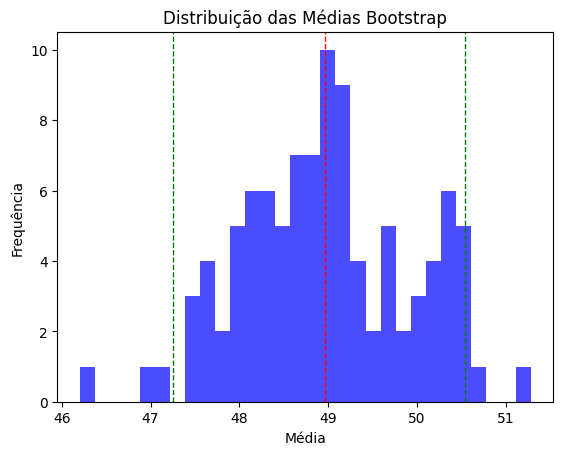

In [ ]:
# Calculando o intervalo de confian√ßa pode ser feito com base no:
  #1. Percentis: √â prefer√≠vel n√£o assume que a distribui√ß√£o das m√©dias bootstrap seja normal.
    #Logo, Mesmo com tamanhos de amostra relativamente pequenos (e distribui√ß√£o possivelmente mais assim√©tria), ainda pode fornecer intervalos de confian√ßa v√°lidos. Tamb√©m √© mais robusto contra outliers.
  #2. Erro padr√£o: Abordagem mais tradicional, mas assume que a distr. das m√©dias do bootstrap seja normal. Dado o j√° citado acima, manter o c√°lculo dos intervalos por meio dos percentis.

conf_interval = np.percentile(bootstrap_means, [2.5, 97.5]) #Esses valores representam os percentis que definem o intervalo de confian√ßa de 95%.
# Arredondando o intervalo de confian√ßa para 2 casas decimais
conf_interval = np.round(conf_interval, 2)

# Calculando a margem de erro: √© a diferen√ßa entre a m√©dia amostral e os limites do intervalo de confian√ßa.
margin_of_error = (conf_interval[1] - conf_interval[0]) / 2
  #√© calculada como a metade da largura do intervalo de confian√ßa

# Resultados
print(f"M√©dia da amostra: {round(np.mean(data),2)} (linha em vermelho).")
print(f"Margem de erro: ¬± {round(margin_of_error, 2)}.")
print(f"Intervalo de confian√ßa: temos 95% de confian√ßa de que a verdadeira m√©dia da popula√ß√£o est√° entre {conf_interval} (linhas em verde).")
print(f"- Se repet√≠ssemos o processo de amostragem muitas vezes, aproximadamente 95% dos intervalos calculados conter√£o a verdadeira m√©dia da popula√ß√£o.")

# Visualizando a distribui√ß√£o das m√©dias bootstrap: Um histograma das m√©dias bootstrap √© plotado, com linhas verticais indicando a m√©dia da amostra original e os limites do intervalo de confian√ßa.
plt.hist(bootstrap_means, bins=30, alpha=0.7, color='blue')
plt.axvline(np.mean(data), color='red', linestyle='dashed', linewidth=1)
plt.axvline(conf_interval[0], color='green', linestyle='dashed', linewidth=1)
plt.axvline(conf_interval[1], color='green', linestyle='dashed', linewidth=1)
plt.title('Distribui√ß√£o das M√©dias Bootstrap')
plt.xlabel('M√©dia')
plt.ylabel('Frequ√™ncia')
plt.show()

Isto √© √∫til, por exemplo, para dizer que temos 95% de confian√ßa de que a verdadeira nota NPS do grupo A est√° entre 60 e 62, e do grupo B de 65 a 67. Logo, afirmamos que B tem NPS maior que A, pois est√° fora da margem de erro.

Ao usar 10k pontos na amostra, e 10k itera√ß√µes no bootstrap, reduzimos a varia√ß√£o do intervalo de confian√ßa, e logo a margem de erro, obtendo uma m√©dia da amostra mais pr√≥xima da m√©dia real da popula√ß√£o:
- M√©dia da amostra: 49.97 (linha em vermelho).
- Margem de erro: ¬± 0.2.
- Intervalo de confian√ßa: temos 95% de confian√ßa de que a verdadeira m√©dia da popula√ß√£o est√° entre [49.78 50.18] (linhas em verde).


#### Teste de Hip√≥tese

- Hip√≥tese Nula (H‚ÇÄ): A afirma√ß√£o inicial que se presume verdadeira at√© que evid√™ncias contr√°rias sejam apresentadas. Geralmente, representa a ideia de "nenhum efeito" ou "nenhuma diferen√ßa".
 - Ex: Testar se a m√©dia de uma popula√ß√£o √© diferente de 50.

- Hip√≥tese Alternativa (H‚ÇÅ ou Ha): A afirma√ß√£o que ser√° aceita se as evid√™ncias contr√°rias √† hip√≥tese nula forem suficientemente fortes. Representa a ideia de "algum efeito" ou "alguma diferen√ßa".

No cen√°rio abaixo:
- H‚ÇÄ (nula): A m√©dia da popula√ß√£o √© 50.
- H‚ÇÅ (alternativa): A m√©dia da popula√ß√£o n√£o √© 50.
- N√≠vel de signific√¢ncia (Œ±) = 0,05 (n√≠vel de confian√ßa de 95%)
 - Um Œ± = 0,05 significa que voc√™ est√° disposto a aceitar uma probabilidade de 5% de cometer um erro do tipo I: rejeitar a hip√≥tese nula (H‚ÇÄ) quando ela √© verdadeira.

In [ ]:
#aproveita o c√≥digo j√° gerado acima do bootstrap:
print(f'A partir do conjunto original de 100 pontos, foram geradas {len(bootstrap_means)} amostras bootstrap, cada uma selecionando 100 pontos aleatoriamente (podendo ser repetidos) com reposi√ß√£o. \nFoi calculada ent√£o a m√©dia de cada grupo de 100 pontos. Exemplos: {bootstrap_means[:5]}')

A partir do conjunto original de 100 pontos, foram geradas 1000 amostras bootstrap, cada uma selecionando 100 pontos aleatoriamente (podendo ser repetidos) com reposi√ß√£o. 
Foi calculada ent√£o a m√©dia de cada grupo de 100 pontos. Exemplos: [48.88660717 48.72053516 48.42534363 48.79683588 47.69467533]


In [ ]:
# Definindo a m√©dia sob a hip√≥tese nula
hypothesized_mean = 50  # Hip√≥tese nula
# Calculando a m√©dia da nova amostra
observed_mean = np.mean(data)

# Ajustando a distribui√ß√£o bootstrap para simular a hip√≥tese nula
bootstrap_means_null = bootstrap_means - np.mean(bootstrap_means) + hypothesized_mean
# Calculando o valor-p corretamente: Vamos calcular a propor√ß√£o de amostras bootstrap sob a hip√≥tese nula cuja m√©dia √© mais extrema do que a m√©dia observada
p_value = np.mean(bootstrap_means_null >= observed_mean)


# Resultados
print(f"M√©dia da amostra: {observed_mean}")
print(f"Valor-p: {p_value}")

# Interpreta√ß√£o do valor-p
alpha = 0.05
if p_value < alpha:
    print("Rejeitamos a hip√≥tese nula: a m√©dia da popula√ß√£o √© significativamente diferente de 50.")
else:
    print("N√£o rejeitamos a hip√≥tese nula: n√£o h√° evid√™ncias suficientes para afirmar que a m√©dia da popula√ß√£o √© diferente de 50.")

M√©dia da amostra: 48.96153482605907
Valor-p: 0.877
N√£o rejeitamos a hip√≥tese nula: n√£o h√° evid√™ncias suficientes para afirmar que a m√©dia da popula√ß√£o √© diferente de 50.


Alterando agora a m√©dia dos 100 dados gerados 53, mantendo o std 100:

In [ ]:
np.random.seed(42)
new_data = np.random.normal(loc=53, scale=10, size=100)  # M√©dia elevada para for√ßar a rejei√ß√£o da H0
print(f'Gerada uma amostra aleat√≥ria de 100 dados normalmente distribu√≠dos, com m√©dia 53 e desvio padr√£o 10')
print(f'Exemplo de alguns dos 100 pontos gerados: {new_data[:5]}')

Gerada uma amostra aleat√≥ria de 100 dados normalmente distribu√≠dos, com m√©dia 53 e desvio padr√£o 10
Exemplo de alguns dos 100 pontos gerados: [57.96714153 51.61735699 59.47688538 68.23029856 50.65846625]


In [ ]:
# Realizando o bootstrap novamente, com os novos dados:
bootstrap_means = bootstrap(new_data)
print(f'A partir do conjunto original de 100 pontos, foram geradas {len(bootstrap_means)} amostras bootstrap, cada uma selecionando 100 pontos aleatoriamente (podendo ser repetidos) com reposi√ß√£o. \nFoi calculada ent√£o a m√©dia de cada grupo de 100 pontos. Exemplos: {bootstrap_means[:5]}')

A partir do conjunto original de 100 pontos, foram geradas 1000 amostras bootstrap, cada uma selecionando 100 pontos aleatoriamente (podendo ser repetidos) com reposi√ß√£o. 
Foi calculada ent√£o a m√©dia de cada grupo de 100 pontos. Exemplos: [51.88660717 51.72053516 51.42534363 51.79683588 50.69467533]


√â poss√≠vel ver agora que as amostras do bootstrap geram m√©dias um pouco mais altas que as anteriores, dado que a m√©dia agora √© 53.

In [ ]:
# Definindo a m√©dia sob a hip√≥tese nula
hypothesized_mean = 50  # Hip√≥tese nula
# Calculando a m√©dia da nova amostra:
observed_mean = np.mean(new_data)

# Ajustando a distribui√ß√£o bootstrap para simular a hip√≥tese nula
bootstrap_means_null = bootstrap_means - np.mean(bootstrap_means) + hypothesized_mean
# Calculando o valor-p corretamente: Vamos calcular a propor√ß√£o de amostras bootstrap sob a hip√≥tese nula cuja m√©dia √© mais extrema do que a m√©dia observada
p_value = np.mean(bootstrap_means_null >= observed_mean)

# Resultados
print(f"M√©dia da amostra: {observed_mean}")
print(f"Valor-p: {p_value}")

# Interpreta√ß√£o do valor-p
alpha = 0.05
if p_value < alpha:
    print("Rejeitamos a hip√≥tese nula: a m√©dia da popula√ß√£o √© significativamente diferente de 50.")
else:
    print("N√£o rejeitamos a hip√≥tese nula: n√£o h√° evid√™ncias suficientes para afirmar que a m√©dia da popula√ß√£o √© diferente de 50.")

M√©dia da amostra: 51.96153482605907
Valor-p: 0.012
Rejeitamos a hip√≥tese nula: a m√©dia da popula√ß√£o √© significativamente diferente de 50.


Agora, √© poss√≠vel afirmar n√≠vel de confian√ßa de 95% que: a m√©dia da popula√ß√£o √© significativamente diferente de 50.

Poderia tamb√©m utilizar o teste t, ao inv√©s do bootstrap aqui, mas ele tem a normalidade como premissa, o que dificulta.

### Distribui√ß√µes

Os dados costumam ser consistentes com mais de um tipo de distribui√ß√£o. Existem tipos de distribui√ß√£o melhores para modelar dadas situa√ß√µes.



#### Normal

- A distribui√ß√£o gaussiana √© sim√©trica em torno da m√©dia.
- Raramente as features s√£o normalmente distribu√≠das. A utilidade da distr. normal vem do fato de que seg. o TCL, a distribui√ß√£o das m√©dias amostrais tende a uma normal, conforme o tamanho das amostras cresce.
 - Mesmo assim, seu uso s√≥ vem em √∫ltimo recurso, quando distribui√ß√µes bootstrap n√£o est√£o dispon√≠veis, como no caso de uma popula√ß√£o muito pequena (menor que 30 a 50 pontos).

 Regress√£o √† m√©dia:
- Observa√ß√µes extremas tendem a ser seguidas pelas mais centrais.

##### Normal Padr√£o

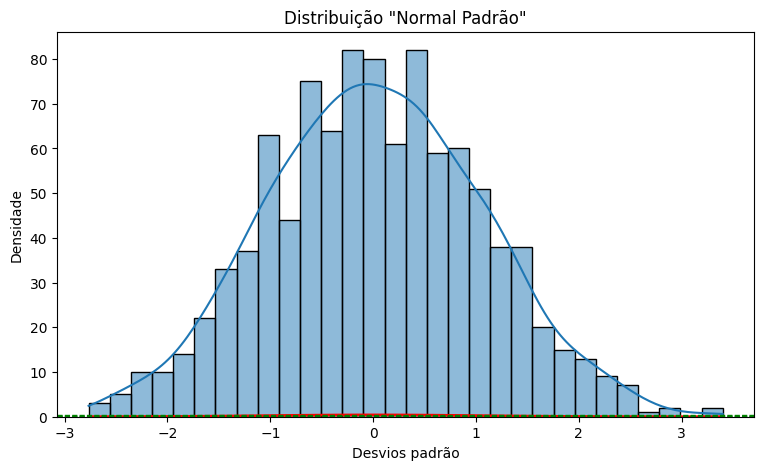

In [ ]:
# Definindo os par√¢metros da distribui√ß√£o normal
mean = 0
std_dev = 1

# Gerando dados sint√©ticos
np.random.seed(98)
data_norm = np.random.normal(loc=mean, scale=std_dev, size=1000)

# Criando o gr√°fico
plt.figure(figsize=(9, 5))
sns.histplot(data_norm, kde=True, bins=30)

# Plotando a curva normal
x = np.linspace(data_norm.min(), data_norm.max(), 100)
pdf = (np.exp(-(x - mean)**2 / (2 * std_dev**2)) / (std_dev * np.sqrt(2 * np.pi)))
plt.plot(x, pdf, color='red', linewidth=2)

# Adicionando linhas no eixo y para 1, 2 e 3 desvios padr√µes
plt.axhline(y=0.3989, color='green', linestyle='--', linewidth=1)  # 1 desvio padr√£o
plt.axhline(y=0.1989, color='green', linestyle='--', linewidth=1)  # 2 desvios padr√µes
plt.axhline(y=0.0668, color='green', linestyle='--', linewidth=1)  # 3 desvios padr√µes

# Configurando o t√≠tulo e r√≥tulos dos eixos
plt.title('Distribui√ß√£o "Normal Padr√£o"')
plt.xlabel('Desvios padr√£o')
plt.ylabel('Densidade')

# Exibindo o gr√°fico
plt.show()

A distribui√ß√£o "Normal Padr√£o" √© aquela na qual as unidades no eixo x, s√£o expressas em desvios-padr√£o da m√©dia.
- 68% dos dados est√£o dentro de 1 std da m√©dia.
- 95% dentro de 2.
- 99,7 dentro de 3.

##### Gr√°fico QQ (Quantile-Quantile)

Serve para mostrar visualmente o qu√£o pr√≥xima uma amostra est√° de uma distribui√ß√£o normal.
 - Eixo X: quantis da distribui√ß√£o te√≥rica (comparado com uma normal). Eixo y: quantis de dados amostrais.
  - Os quantis variam de 0 a 1, mas quando estamos lidando com dados reais, os valores dos quantis podem ser representados em qualquer escala que os dados utilizem.
 - Se os pontos da feature se alinharem pr√≥ximas da linha diagonal, isso sugere que os dados seguem uma distribui√ß√£o normal.
 - Se houver desvios significativos, isso indica que os dados n√£o s√£o normalmente distribu√≠dos.
  - Se houver um formato em S ao redor da linha, indica a presenta de cauda.
  - Se os pontos estiverem agrupados numa √°rea espec√≠fica do gr√°fico, sugere a presen√ßa de outliers ou que a distribui√ß√£o dos dados √© assim√©trica.

In [ ]:
data_norm[:5]

array([ 0.47371708,  1.63760344,  0.99854198, -0.70740687, -1.0422073 ])

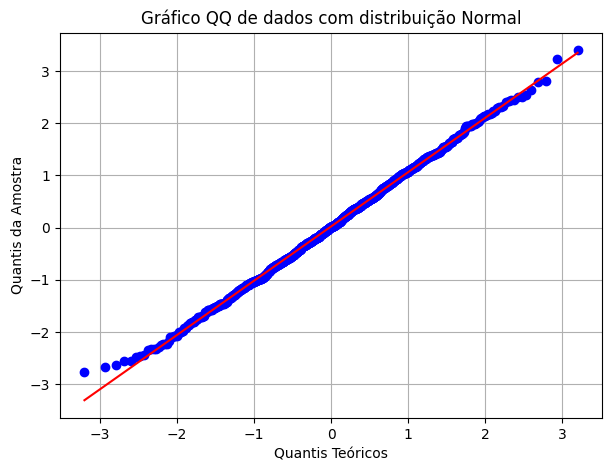

In [ ]:
# Criando o gr√°fico QQ, dos dados sint√©ticos criados mais acima:
plt.figure(figsize=(7, 5))
stats.probplot(data_norm, dist="norm", plot=plt)

# Configurando o t√≠tulo e r√≥tulos dos eixos
plt.title('Gr√°fico QQ de dados com distribui√ß√£o Normal')
plt.xlabel('Quantis Te√≥ricos')
plt.ylabel('Quantis da Amostra')

# Exibindo o gr√°fico
plt.grid()
plt.show()

Como os pontos acompanham a linha, confirmamos que trata-se de uma distribui√ß√£o normal.

#### Cauda Longa

Distr cauda longa: a cauda de um dos lados √© mais longa.

Plotar histograma com curva de densidade, para avaliar a curva:

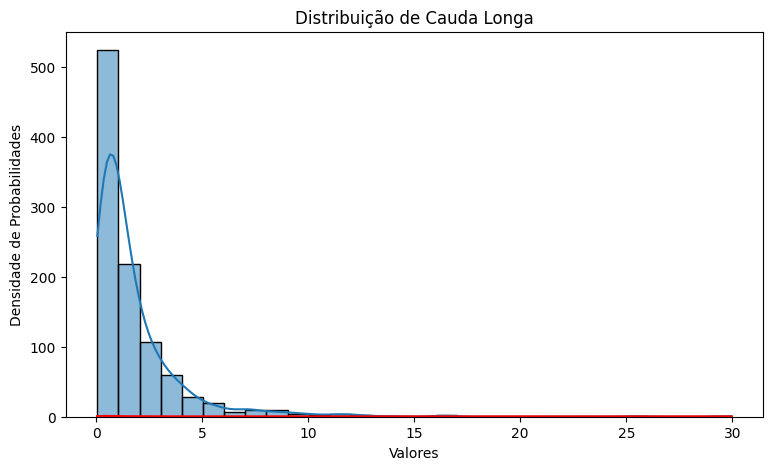

In [ ]:
# Definindo os par√¢metros da distribui√ß√£o log-normal
mean = 0
std_dev = 1

# Gerando dados sint√©ticos com distribui√ß√£o log-normal
np.random.seed(98)
data_caulong = np.random.lognormal(mean=mean, sigma=std_dev, size=1000)

# Criando o gr√°fico
plt.figure(figsize=(9, 5))
sns.histplot(data_caulong, kde=True, bins=30)

# Plotando a curva da distribui√ß√£o log-normal
x = np.linspace(data_caulong.min(), data_caulong.max(), 100)
pdf = (np.exp(-(np.log(x) - mean)**2 / (2 * std_dev**2)) / (x * std_dev * np.sqrt(2 * np.pi)))
plt.plot(x, pdf, color='red', linewidth=2)

# Configurando o t√≠tulo e r√≥tulos dos eixos
plt.title('Distribui√ß√£o de Cauda Longa')
plt.xlabel('Valores')
plt.ylabel('Densidade de Probabilidades')

# Exibindo o gr√°fico
plt.show()

Os pontos caem de forma decrescente ao longo do gr√°fico, gerando uma cauda longa vis√≠vel.

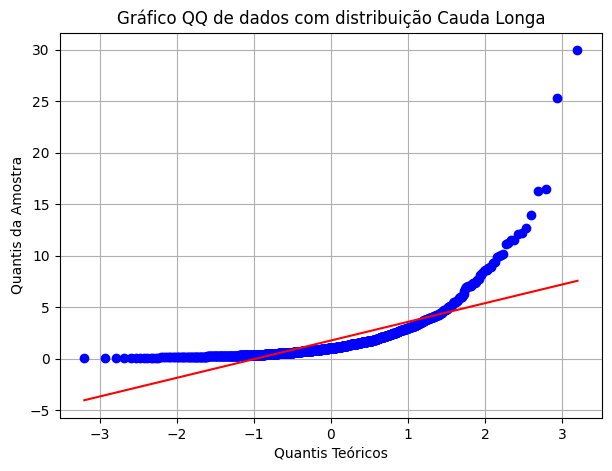

In [ ]:
# Criando o gr√°fico QQ, dos dados sint√©ticos criados mais acima:
plt.figure(figsize=(7, 5))
stats.probplot(data_caulong, dist="norm", plot=plt)

# Configurando o t√≠tulo e r√≥tulos dos eixos
plt.title('Gr√°fico QQ de dados com distribui√ß√£o Cauda Longa')
plt.xlabel('Quantis Te√≥ricos')
plt.ylabel('Quantis da Amostra')

# Exibindo o gr√°fico
plt.grid()
plt.show()

O formato em S ao redor da linha, indica a presenta de cauda.

#### t de Student

√â uma distribui√ß√£o normal, mas com caudas mais longas.
- A distribui√ß√£o t de Student √© usada quando o tamanho da amostra √© pequeno (geralmente ùëõ<30) e/ou quando a variabilidade da popula√ß√£o √© desconhecida.
- Ressaltando que, para amostras maires, a distribui√ß√£o das m√©dias amostrais se aproxima de uma distribui√ß√£o normal (TCL).







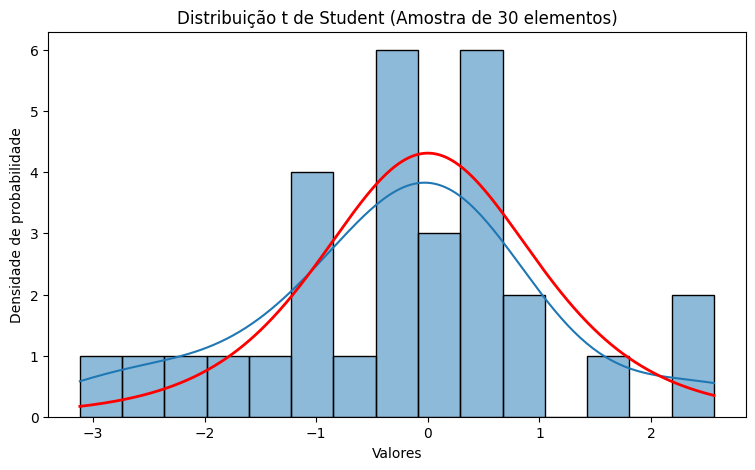

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Definindo os par√¢metros da distribui√ß√£o t de Student
grausl = 5  # graus de liberdade

# Gerando dados sint√©ticos com distribui√ß√£o t de Student para uma amostra de 30 elementos
np.random.seed(98)
data_student = np.random.standard_t(grausl, size=30)

#Setando o n√∫mero de bins
bins = 15

# Criando o gr√°fico
plt.figure(figsize=(9, 5))
sns.histplot(data_student, bins=bins, stat="count", kde=True)

# Plotando a curva da distribui√ß√£o t de Student (red)
x = np.linspace(data_student.min(), data_student.max(), 1000)
pdf = stats.t.pdf(x, grausl)  # Fun√ß√£o de densidade de probabilidade da distribui√ß√£o t
plt.plot(x, pdf * len(data_student) * (data_student.max() - data_student.min()) / bins, color='red', linewidth=2)  # Ajustando a curva para contagem

# Configurando o t√≠tulo e r√≥tulos dos eixos
plt.title('Distribui√ß√£o t de Student (Amostra de 30 elementos)')
plt.xlabel('Valores')
plt.ylabel('Densidade de probabilidade')

# Exibindo o gr√°fico
plt.show()

Em vermelho, temos a  curva da distribui√ß√£o t de Student.

Esse gr√°fico √© √∫til para visualizar como os dados se distribuem em uma amostra pequena, refletindo a incerteza e a variabilidade associadas a amostras menores.

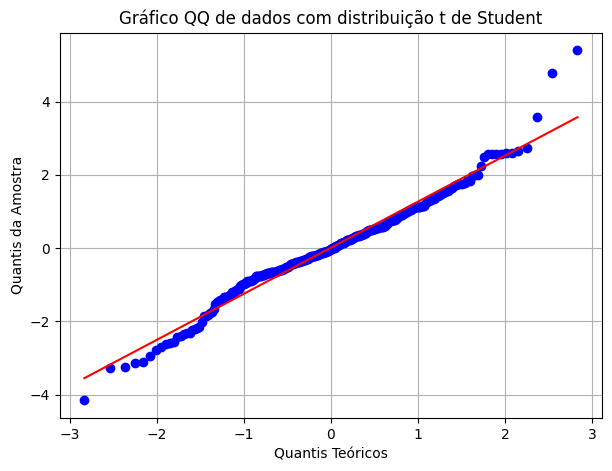

In [ ]:
# Criando o gr√°fico QQ, dos dados sint√©ticos criados mais acima:
plt.figure(figsize=(7, 5))
stats.probplot(data_tsudent, dist="norm", plot=plt)

# Configurando o t√≠tulo e r√≥tulos dos eixos
plt.title('Gr√°fico QQ de dados com distribui√ß√£o t de Student')
plt.xlabel('Quantis Te√≥ricos')
plt.ylabel('Quantis da Amostra')

# Exibindo o gr√°fico
plt.grid()
plt.show()

#### Binomial

Binomial: ter dois resultados poss√≠veis. Ex: 0/1, sim/n√£o, comprar/n√£o comprar.
- √â a distribui√ß√£o do n√∫medo de sucessos em x ensaios.
- Resultados binomiais s√£o importantes para modelar, j√° que representam decis√µes fundamentais, como clicar/n√£o clicar.
- Em estat√≠stica, √© comum chamar 1 de "sucesso", atribu√≠ndo ele ao resultado mais raro.
 - "Sucesso" n√£o indica que o resultado seja ben√©fico, mas sim que √© o resultado de interesse.
 - Ex: A uma transa√ß√£o fraudulenta como vari√°vel dependente seria atribu√≠do 1 (mais rara, √© de interesse prever), e a uma transa√ß√£o n√£o fraudulenta, 0.
 - Responde quest√µes como: Se a probabilidade de um clique se converter em venda √© 0,02, qual a probabilidade de se observar 0 vendas em 200 cliques?

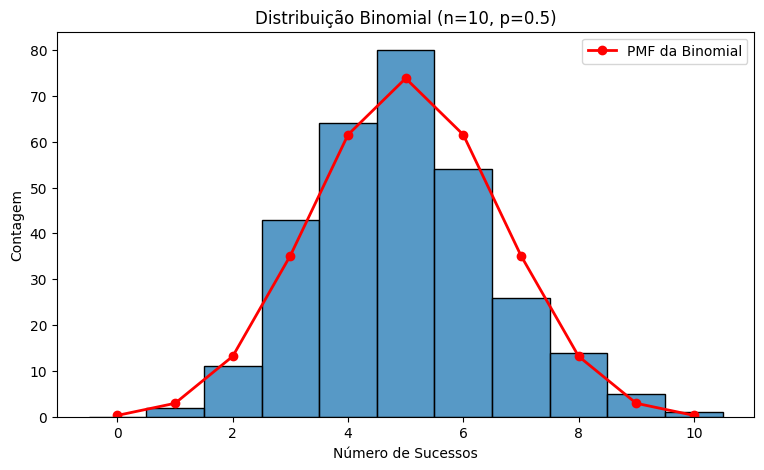

In [ ]:
# Definindo os par√¢metros da distribui√ß√£o binomial
n = 10  # n√∫mero de ensaios
p = 0.5  # probabilidade de sucesso

# Gerando dados sint√©ticos com distribui√ß√£o binomial
np.random.seed(98)
data_binomial = np.random.binomial(n, p, size=300)

# Criando o gr√°fico
plt.figure(figsize=(9, 5))
sns.histplot(data_binomial, bins=np.arange(-0.5, n + 1.5, 1), stat="count", kde=False)

# Plotando a curva da distribui√ß√£o binomial
x = np.arange(0, n + 1)
pmf = stats.binom.pmf(x, n, p)  # Fun√ß√£o de massa de probabilidade da distribui√ß√£o binomial
plt.plot(x, pmf * len(data_binomial), color='red', linewidth=2, marker='o', label='PMF da Binomial')  # Ajustando a curva para contagem

# Configurando o t√≠tulo e r√≥tulos dos eixos
plt.title('Distribui√ß√£o Binomial (n=10, p=0.5)')
plt.xlabel('N√∫mero de Sucessos')
plt.ylabel('Contagem')
plt.legend()
plt.show()

In [ ]:
data_binomial[:10]

array([6, 5, 4, 6, 5, 3, 5, 5, 4, 3])

O gr√°fico mostra a distribui√ß√£o dos sucessos em n=10 ensaios, com uma probabilidade de sucesso de p=0.5.

PMF: fun√ß√£o de massa de probabilidade da distribui√ß√£o binomial.

--

Exemplo de quest√£o: Se a probabilidade de um clique se converter em venda √© 0,02, qual a probabilidade de se observar 0 vendas em 200 cliques?

In [ ]:
# Definindo os par√¢metros
n = 200  # n√∫mero de cliques
p = 0.02  # probabilidade de convers√£o

# Calculando a probabilidade de 0 vendas
k = 0  # n√∫mero de vendas observadas
probabilidade_0_vendas = stats.binom.pmf(k, n, p)

# Exibindo o resultado
print(f"A probabilidade de observar 0 vendas em {n} cliques √©: {probabilidade_0_vendas:.2f}")

A probabilidade de observar 0 vendas em 200 cliques √©: 0.02


#### Poisson

Distribui√ß√£o de probabilidade que modela eventos por per√≠odo de tempo.
- Descreve a probabilidade de um n√∫mero x de eventos ocorrer em um intervalo fixo de tempo ou espa√ßo, desde que eventos ocorram c/ taxa m√©dia constante e independentemente do tempo desde o √∫ltimo evento.
- Ex: Mostrar a probabilidade de diferentes n√∫meros de chamadas serem recebidas por um SAC em um minuto.
- √â ideal para modelar eventos que ocorrem raramente em um determinado intervalo.
- Par√¢metro Œª (lambda): representa a m√©dia (ou taxa) de eventos que ocorrem em um intervalo fixo.   
 - Ex: se a m√©dia de chamadas recebidas em um SAC √© de 2 por minuto, ent√£o Œª = 2.
- Independ√™ncia: eventos s√£o considerados independentes: a ocorr√™ncia de um evento n√£o afeta a probabilidade de ocorr√™ncia de outro.

Problema: Qual o n√∫mero de atendentes necess√°rio para ter 95% de certeza que chamadas que chegam ao SAC numa m√©dia de 2 por minuto, sejam atendidas em at√© 1 minuto?

In [ ]:
# Definindo os par√¢metros
lambda_rate = 2  # m√©dia de chamadas por minuto
tempo_alvo = 1  # atender em at√© 1 minuto
confianca = 0.95  # 95% de confian√ßa

# Fun√ß√£o para encontrar o n√∫mero m√≠nimo de atendentes
def encontrar_num_atendentes(lambda_rate, tempo_alvo, confianca):
    lambda_total = lambda_rate * tempo_alvo  # Œª = 2 chamadas/minuto * 1 minuto = 2 chamadas

    # Iniciar com 1 atendente
    num_atendentes = 1

    # Calcular a probabilidade acumulada at√© atingir a confian√ßa desejada
    while True:
        # Probabilidade de atender todas as chamadas com o n√∫mero atual de atendentes
        prob_acumulada = poisson.cdf(num_atendentes, lambda_total)

        if prob_acumulada >= confianca:
            break

        num_atendentes += 1

    return num_atendentes  # Retornar o n√∫mero m√≠nimo de atendentes

# Encontrar o n√∫mero m√≠nimo de atendentes
num_atendentes = encontrar_num_atendentes(lambda_rate, tempo_alvo, confianca)

# Exibir o resultado
print(f"Para ter 95% de certeza que as chamadas ser√£o atendidas em at√© 1 minuto, com uma taxa m√©dia de 2 chamadas por minuto, s√£o necess√°rios {num_atendentes} atendentes.")

Para ter 95% de certeza que as chamadas ser√£o atendidas em at√© 1 minuto, com uma taxa m√©dia de 2 chamadas por minuto, s√£o necess√°rios 5 atendentes.


Plot da poisson:

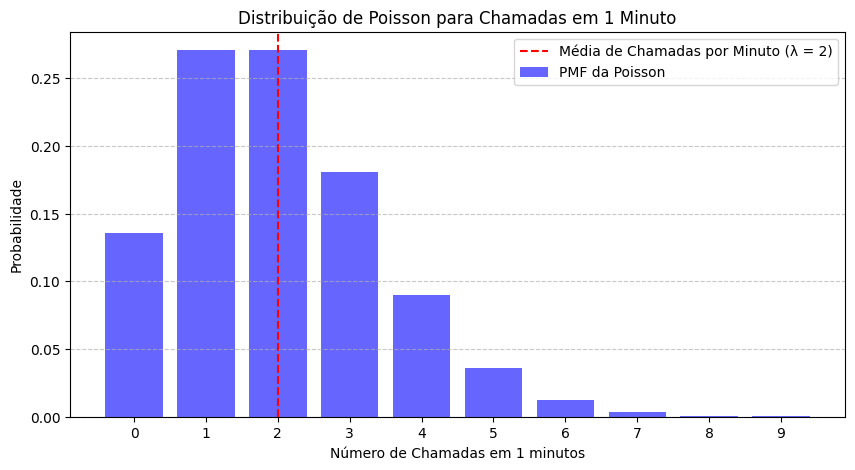

In [ ]:
#Plot

# Definindo os par√¢metros
lambda_rate = 2  # m√©dia de chamadas por minuto
n_minutes = 200   # n√∫mero de minutos

# Criando um array de valores de chamadas poss√≠veis
x = np.arange(0, 10)  # Valores de 0 a 9 chamadas

# Calculando a PMF da distribui√ß√£o de Poisson
pmf = poisson.pmf(x, lambda_rate)

# Criando o gr√°fico
plt.figure(figsize=(10, 5))
plt.bar(x, pmf, color='blue', alpha=0.6, label='PMF da Poisson')
plt.title('Distribui√ß√£o de Poisson para Chamadas em 1 Minuto')
plt.xlabel('N√∫mero de Chamadas em 1 minutos')
plt.ylabel('Probabilidade')
plt.xticks(x)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adicionando uma linha de refer√™ncia para a m√©dia
plt.axvline(x=lambda_rate, color='red', linestyle='--', label='M√©dia de Chamadas por Minuto (Œª = 2)')

# Adicionando a legenda
plt.legend()

# Exibindo o gr√°fico
plt.show()

A maioria das chamadas se concentra em torno da m√©dia (2 chamadas), com a probabilidade diminuindo rapidamente √† medida que nos afastamos desse valor.

Para ter 95% de certeza que as chamadas ser√£o atendidas em at√© 1 minuto, com uma taxa m√©dia de 2 chamadas por minuto, s√£o necess√°rios 5 atendentes:
- Quando o n√∫mero de atendentes √© menor que 5, a probabilidade acumulada de atender todas as chamadas que chegam em um minuto √© inferior a 95%. Com 5, garantimos que a maioria das chamadas (95%) ser√° atendida dentro do tempo de at√© 1 minuto.

#### Exponencial

Usada para modelar o tempo entre eventos em um processo cont√≠nuo (Poisson).
- Ex: Um SAC recebe chamadas a uma taxa m√©dia de 3 chamadas por hora. Queremos modelar o tempo entre as chamadas usando a distribui√ß√£o exponencial.

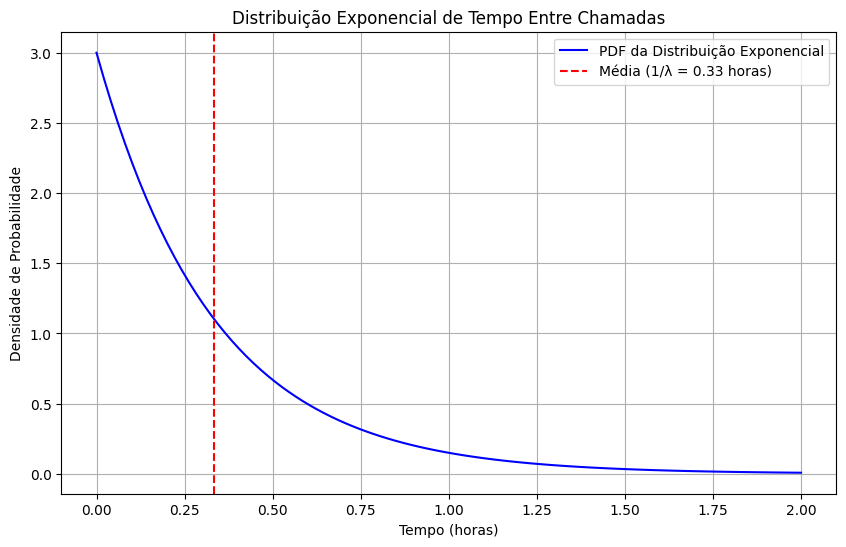

In [ ]:
# Definindo os par√¢metros
lambda_rate = 3  # taxa de chamadas por hora
mean_time_between_calls = 1 / lambda_rate  # m√©dia entre chamadas

# Criando um array de valores de tempo (em horas)
x = np.linspace(0, 2, 100)  # Tempo entre 0 e 2 horas

# Calculando a PDF da distribui√ß√£o exponencial
pdf = expon.pdf(x, scale=1/lambda_rate)

# Criando o gr√°fico
plt.figure(figsize=(10, 6))
plt.plot(x, pdf, color='blue', label='PDF da Distribui√ß√£o Exponencial')
plt.title('Distribui√ß√£o Exponencial de Tempo Entre Chamadas')
plt.xlabel('Tempo (horas)')
plt.ylabel('Densidade de Probabilidade')
plt.axvline(mean_time_between_calls, color='red', linestyle='--', label='M√©dia (1/Œª = {:.2f} horas)'.format(mean_time_between_calls))
plt.legend()
plt.grid()
plt.show()

PDF: fun√ß√£o de densidade de probabilidade da distribui√ß√£o exponencial.

A curva azul mostra uma densidade de probabilidade que diminui rapidamente √† medida que o tempo
aumenta, refletindo que √© mais prov√°vel que as chamadas ocorram em intervalos de tempo curtos do que em intervalos longos.

A linha vermelha indica a m√©dia do tempo entre chamadas, que √© aprox. 20 minutos

#### Weibull

Usada para an√°lises de tempo at√© a falha.

- Aqui, a taxa de evento n√£o permanece constante ao longo do tempo, como com Poisson ou Exponencial.
- Ex: estimar o risco de falha mec√¢nica, onde o risco aumenta com o passar do tempo.

Ex: suponha que uma empresa fabrique l√¢mpadas incandescentes e queira garantir que elas funcionem por pelo menos 10 anos em uso normal.

Para isso, os engenheiros realizam testes acelerados, submetendo as l√¢mpadas a estresses elevados para simular longos per√≠odos de uso e registrando o tempo at√© a falha de cada l√¢mpada.

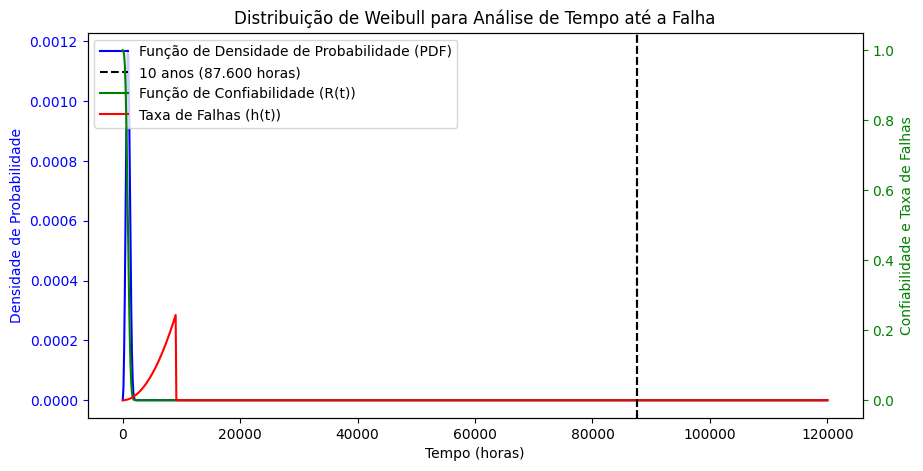

In [ ]:
# Par√¢metros da distribui√ß√£o de Weibull
beta = 3  # par√¢metro de forma
eta = 1000  # par√¢metro de escala (em horas)

# Criar um array de tempos (em horas)
tempos = np.linspace(0, 120000, 1000)  # de 0 a 120.000 horas (aproximadamente 13,7 anos)

# Calcular a fun√ß√£o de densidade de probabilidade (PDF)
pdf = weibull_min.pdf(tempos, beta, scale=eta)

# Calcular a fun√ß√£o de confiabilidade (R(t))
confiabilidade = weibull_min.sf(tempos, beta, scale=eta)

# Calcular a taxa de falhas (h(t))
taxa_falhas = np.zeros_like(tempos)  # Inicializar a taxa de falhas com zeros
indice_valido = confiabilidade > 0  # √çndices onde a confiabilidade √© maior que zero
taxa_falhas[indice_valido] = weibull_min.pdf(tempos[indice_valido], beta, scale=eta) / confiabilidade[indice_valido]

# Criar o gr√°fico
fig, ax1 = plt.subplots(figsize=(10, 5))

# Plotar a PDF
ax1.plot(tempos, pdf, color='blue', label='Fun√ß√£o de Densidade de Probabilidade (PDF)')
ax1.set_xlabel('Tempo (horas)')
ax1.set_ylabel('Densidade de Probabilidade', color='blue')
ax1.tick_params('y', colors='blue')

# Plotar a confiabilidade no eixo y secund√°rio
ax2 = ax1.twinx()
ax2.plot(tempos, confiabilidade, color='green', label='Fun√ß√£o de Confiabilidade (R(t))')
ax2.plot(tempos, taxa_falhas, color='red', label='Taxa de Falhas (h(t))')
ax2.set_ylabel('Confiabilidade e Taxa de Falhas', color='green')
ax2.tick_params('y', colors='green')

# Adicionar linhas verticais para 10 anos
ax1.axvline(x=87600, color='black', linestyle='--', label='10 anos (87.600 horas)')
ax2.axvline(x=87600, color='black', linestyle='--')

# Adicionar t√≠tulo e legenda
ax1.set_title('Distribui√ß√£o de Weibull para An√°lise de Tempo at√© a Falha')
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

# Exibir o gr√°fico
plt.show()

Observe que a taxa de falhas √© zero inicialmente, aumenta gradualmente e depois diminui √† medida que o tempo passa.
- Isso √© frequentemente associado a produtos que apresentam "falhas infantis", onde os itens falham mais frequentemente logo ap√≥s a introdu√ß√£o no mercado devido a defeitos de fabrica√ß√£o ou problemas iniciais. Ap√≥s esse per√≠odo inicial, a taxa de falhas diminui.
- A taxa de falhas pode ser visualizada tamb√©m como uma curva em forma de "banheira", onde h√° uma alta taxa de falhas no in√≠cio (falhas infant√≠s), uma baixa taxa de falhas durante a vida √∫til do produto e, finalmente, um aumento na taxa de falhas √† medida que o produto se aproxima do fim de sua vida √∫til. Isso √© comum em muitos produtos, como eletrodom√©sticos e ve√≠culos.